In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.patches as patches
from scipy.io import loadmat
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
from matplotlib.text import Text

In [2]:
path = os.path.abspath('../../../1_Simulation_Results/numpy_files/')

colormap_data = loadmat('../cold2hot.mat')
cold2hot = ListedColormap(colormap_data['colormap'])
hot2cold = ListedColormap(colormap_data['colormap'][::-1])

# Gaussian

## TDB

In [3]:
model_GaussianTDB = np.load(path+'/Gaussian/TDB/Gaussian_TDB.npz')

LIQ_GT     = model_GaussianTDB['arr1']
FCC_GT     = model_GaussianTDB['arr2']
vel_GT     = model_GaussianTDB['arr3']
temp_GT    = model_GaussianTDB['arr4']
timeS_GT  = model_GaussianTDB['arr5']

time_steps_GT =  timeS_GT.shape[0]

### Phases

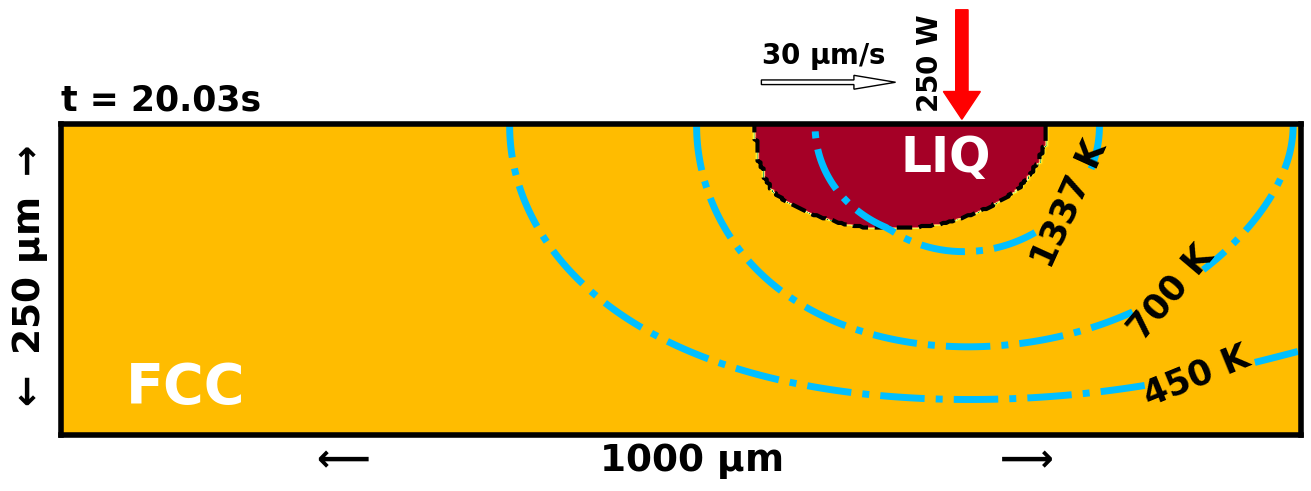

In [4]:
t_step = 352

scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"250 $\mathbf{W}$"

laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_GT[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure

fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

cmap = plt.get_cmap('RdYlGn_r')
cmap.set_under('white', alpha=0)
hmap1 = ax1.imshow(LIQ_GT[:,:,t_step], cmap=cmap, vmin=0.5, vmax=1.0, aspect=0.5,  interpolation='quadric')

cmap = plt.get_cmap('Wistia')
# cmap = cold2hot
cmap.set_under('white', alpha=0) 
hmap2 = ax1.imshow(FCC_GT[:,:,t_step], cmap=cmap, vmin=0.5, vmax=1.5, aspect=0.5, interpolation='quadric')

contour_level_LIQ = [0.8]
contour_LIQ = plt.contour(LIQ_GT[:, :, t_step], levels=contour_level_LIQ, colors='k', linestyles='--', linewidths=3,)

contour_levels = [450, 700,  1337]
contour = ax1.contour(temp_GT[:, :, t_step], levels=contour_levels, colors='deepskyblue', linewidths=5, linestyles='dashdot')
clabels = ax1.clabel(contour, inline=True, fontsize=25, colors='k', fmt='%1.0f K')
for label in clabels: label.set_fontweight('bold')
    
if timeS_GT[t_step] <= 25:
    ax1.arrow(laser_pos,-75, 0, 71,  width = 4, color='red', length_includes_head=True, clip_on=False)
    ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
    if laser_act_pos < 500:
        ax1.set_title(f't = {timeS_GT[t_step]:.2f}s', pad=10, loc='right', fontsize=25, weight='bold')
        ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
    else:
        ax1.set_title(f't = {timeS_GT[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
        ax1.text(laser_pos-65, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos-65, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
else:
    ax1.set_title(f't = {timeS_GT[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
    ax1.text(350, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.text(350, -20, "OFF", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.arrow(400, -10, -50, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
    ax1.arrow(350, -75, 0, 71,  width = 4, color='none', length_includes_head=True, clip_on=False) # to make the figure height same after laser is turned off

    
AuFCC_txt = ax1.text(20,180,'FCC', fontsize = 40, weight='bold', color='white')
if timeS_GT[t_step] <= 25:
    AuLIQ_txt = ax1.text(laser_pos-20, 30,'LIQ', fontsize = 35, weight='bold', color='white')


ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,401)

################## Dimensions ###################
ax1.set_xlabel('$\mathbf{\longleftarrow}$                 1000 $ \mathbf{\mu m}$                $\mathbf{\longrightarrow}$', fontsize = 27, weight ='bold',)
ax1.annotate(r'$\mathbf{\leftarrow}$ 250 $\mathbf{\mu m}$ $\mathbf{\rightarrow}$', xy=(0.5, 0.5), xytext=(-0.025, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 27, weight = 'bold', color='k', ha='center', va='center')

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(4)
# ax1.add_patch(patches.Rectangle((-1, -1), 402, 202, linewidth=4, edgecolor='k', facecolor='none'))

# plt.savefig('../../figures/Phase_GaussianTDB.png',bbox_inches='tight', dpi=800)

plt.show()

### Temperature

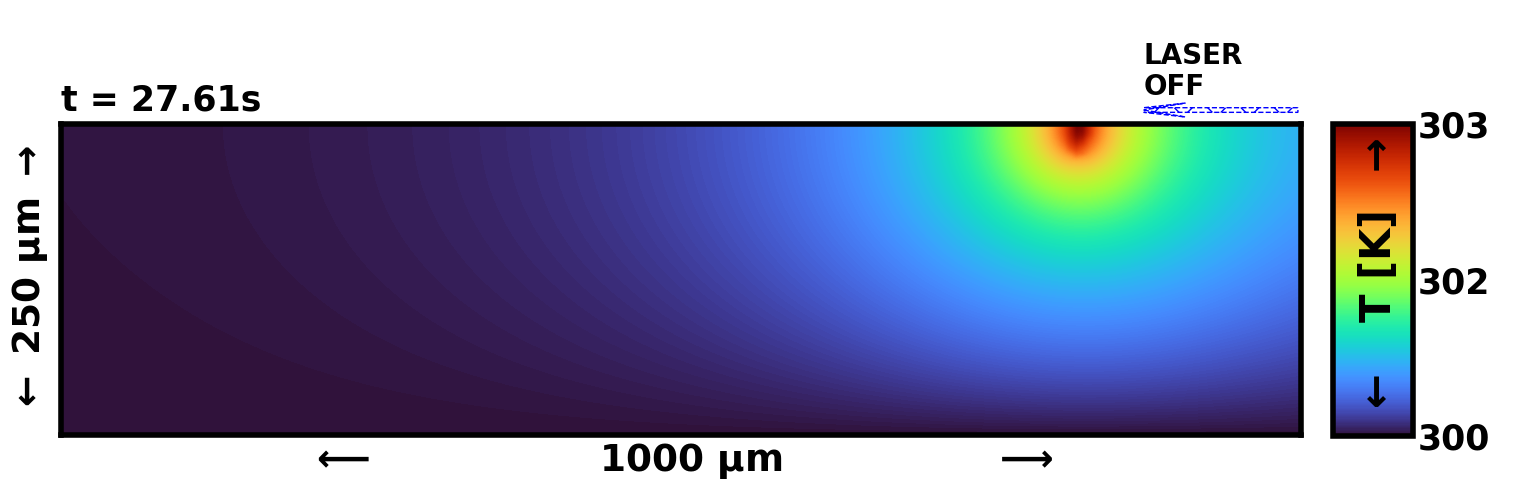

In [5]:
t_step = 515

scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"250 $\mathbf{W}$"

laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_GT[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure

fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

hmap1 = ax1.imshow(temp_GT[:,:,t_step], cmap='turbo', vmin=300, aspect=0.5,  interpolation='quadric')

if timeS_GT[t_step] <= 25:
    ax1.arrow(laser_pos,-75, 0, 71,  width = 4, color='red', length_includes_head=True, clip_on=False)
    ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
    if laser_act_pos < 500:
        ax1.set_title(f't = {timeS_GT[t_step]:.2f}s', pad=10, loc='right', fontsize=25, weight='bold')
        ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
    else:
        ax1.set_title(f't = {timeS_GT[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
        ax1.text(laser_pos-65, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos-65, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
else:
    ax1.set_title(f't = {timeS_GT[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
    ax1.text(350, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.text(350, -20, "OFF", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.arrow(400, -10, -50, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
    ax1.arrow(350, -75, 0, 71,  width = 4, color='none', length_includes_head=True, clip_on=False) # to make the figure height same after laser is turned off

ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,401)

contour_levels = [450, 700,  1337]
contour = plt.contour(temp_GT[:, :, t_step], levels=contour_levels, colors='white', linewidths=8,)
clabels = plt.clabel(contour, inline=True, fontsize=24, colors='k', fmt='%1.0f K')
for label in clabels: label.set_fontweight('bold')

################## Dimensions ###################
ax1.set_xlabel('$\mathbf{\longleftarrow}$                 1000 $ \mathbf{\mu m}$                $\mathbf{\longrightarrow}$', fontsize = 27, weight ='bold',)
ax1.annotate(r'$\mathbf{\leftarrow}$ 250 $\mathbf{\mu m}$ $\mathbf{\rightarrow}$', xy=(0.5, 0.5), xytext=(-0.025, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 27, weight = 'bold', color='k', ha='center', va='center')

############## Color Bar ###########
ax2 = fig.add_axes([0.92, 0.3, 0.05, 0.39]) 
ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
# cbar.set_label(r'$\mathbf{\leftarrow}$   T [K]  $\mathbf{\rightarrow}$', color='k',  labelpad=-115, fontsize=30, rotation=90, weight='bold')
text = Text(x=0.935, y=0.335, text=r'$\mathbf{\leftarrow}$   T [K]  $\mathbf{\rightarrow}$', fontsize=30, color='k', rotation=90, weight='bold')
fig.add_artist(text)

if timeS_GT[t_step] <= 25:
    cbar.set_ticks([np.min(temp_GT[:,:,t_step])*1.06, (np.max(temp_GT[:,:,t_step]))/2, np.max(temp_GT[:,:,t_step])*0.96], labels=[f'{np.min(temp_GT[:,:,t_step]):.0f}', f'{np.max(temp_GT[:,:,t_step])/2 :.0f}', f'{np.max(temp_GT[:,:,t_step])*0.95:.0f}'], weight='bold') 
else:
    cbar.set_ticks([np.min(temp_GT[:,:,t_step]), (np.max(temp_GT[:,:,t_step])+np.min(temp_GT[:,:,t_step]))/2, np.max(temp_GT[:,:,t_step])], labels=[f'{np.min(temp_GT[:,:,t_step]):.0f}', f'{(np.max(temp_GT[:,:,t_step])+np.min(temp_GT[:,:,t_step]))/2 :.0f}', f'{np.max(temp_GT[:,:,t_step]):.0f}'], weight='bold') 

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(4)
ax1.spines[:].set_color('k')
ax2.spines[:].set_linewidth(4)
line = Line2D([1.04, 1.04], [0.35, 0.65], transform=fig.transFigure, color="none", linewidth=3, linestyle='-')
fig.add_artist(line)

# plt.savefig('../../figures/Temp_GaussianTDB.png',bbox_inches='tight', dpi=800)
plt.show()

### Velocity

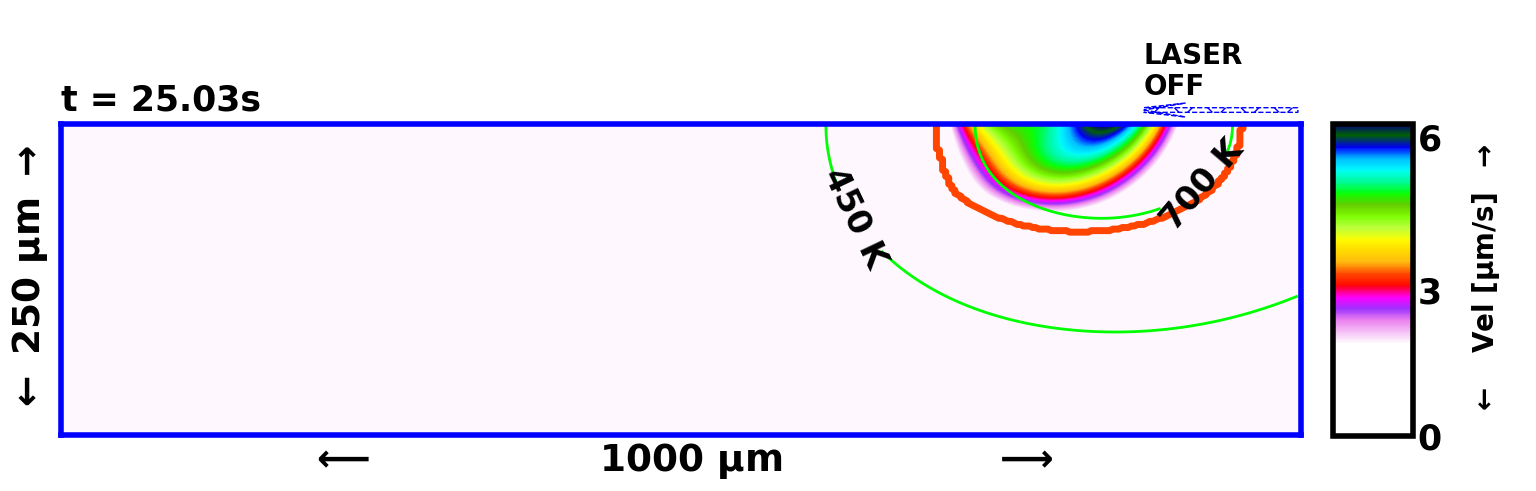

In [6]:
t_step = 436

scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"250 $\mathbf{W}$"

laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_GT[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure


fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))


hmap1 = ax1.imshow(vel_GT[:,:,t_step], cmap='gist_ncar_r', vmin=2, aspect=0.5,  interpolation='bilinear')
# AuFCC_txt = ax1.text(320,180,'FCC', fontsize = 35, weight='bold', color='green')
# AuLIQ_txt = ax1.text(laser_pos-20, 30,'LIQ', fontsize = 35, weight='bold', color='white')

######################### Laser Arrow ###########################
if timeS_GT[t_step] <= 25:
    ax1.arrow(laser_pos,-75, 0, 71,  width = 4, color='red', length_includes_head=True, clip_on=False)
    ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
    if laser_act_pos < 500:
        ax1.set_title(f't = {timeS_GT[t_step]:.2f}s', pad=10, loc='right', fontsize=25, weight='bold')
        ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
    else:
        ax1.set_title(f't = {timeS_GT[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
        ax1.text(laser_pos-65, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos-65, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
else:
    ax1.set_title(f't = {timeS_GT[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
    ax1.text(350, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.text(350, -20, "OFF", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.arrow(400, -10, -50, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
    ax1.arrow(350, -75, 0, 71,  width = 4, color='none', length_includes_head=True, clip_on=False) # to make the figure height same after laser is turned off
    
contour_level_LIQ = [0.8]
contour_LIQ = plt.contour(LIQ_GT[:, :, t_step], levels=contour_level_LIQ, colors='orangered', linestyles='-', linewidths=5,)

contour_levels = [450, 700, 1337]
contour = plt.contour(temp_GT[:, :, t_step], levels=contour_levels, colors='lime', linewidths=2,)
clabels = plt.clabel(contour, inline=True, fontsize=24, colors='k', fmt='%1.0f K')

ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,401)

for label in clabels: label.set_fontweight('bold')
    
################## Dimensions ###################
ax1.set_xlabel('$\mathbf{\longleftarrow}$                 1000 $ \mathbf{\mu m}$                $\mathbf{\longrightarrow}$', fontsize = 27, weight ='bold',)
ax1.annotate(r'$\mathbf{\leftarrow}$ 250 $\mathbf{\mu m}$ $\mathbf{\rightarrow}$', xy=(0.5, 0.5), xytext=(-0.025, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 27, weight = 'bold', color='k', ha='center', va='center')

############## Color Bar ###########
ax2 = fig.add_axes([0.92, 0.3, 0.05, 0.39]) 
ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
cbar.set_label(r'$\mathbf{\leftarrow}$   Vel $\mathbf{[\mu m/s]}$  $\mathbf{\rightarrow}$', color='k',  labelpad=20, fontsize=20, rotation=90, weight='bold')
cbar.set_ticks([np.max(vel_GT[:,:,t_step])*0.06, (np.max(vel_GT[:,:,t_step]))/2, np.max(vel_GT[:,:,t_step])*0.96], labels=[f'{np.min(vel_GT[:,:,t_step]):.0f}', f'{np.max(vel_GT[:,:,t_step])/2 :.0f}', f'{np.max(vel_GT[:,:,t_step]):.0f}'], weight='bold') 

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(4)
ax1.spines[:].set_color('b')
ax2.spines[:].set_linewidth(4)
line = Line2D([1.041, 1.041], [0.35, 0.65], transform=fig.transFigure, color="none", linewidth=3, linestyle='-')
fig.add_artist(line)

# plt.savefig('../../figures/Vel_GaussianTDB.png',bbox_inches='tight', dpi=800)
plt.show()

## Fitting

In [7]:
model_GaussianFitting = np.load(path+'/Gaussian/Fitting/Gaussian_Fitting.npz')

LIQ_GF     = model_GaussianFitting['arr1']
FCC_GF     = model_GaussianFitting['arr2']
vel_GF     = model_GaussianFitting['arr3']
temp_GF    = model_GaussianFitting['arr4']
timeS_GF  = model_GaussianFitting['arr5']

time_steps =  timeS_GF.shape[0]

### Phases

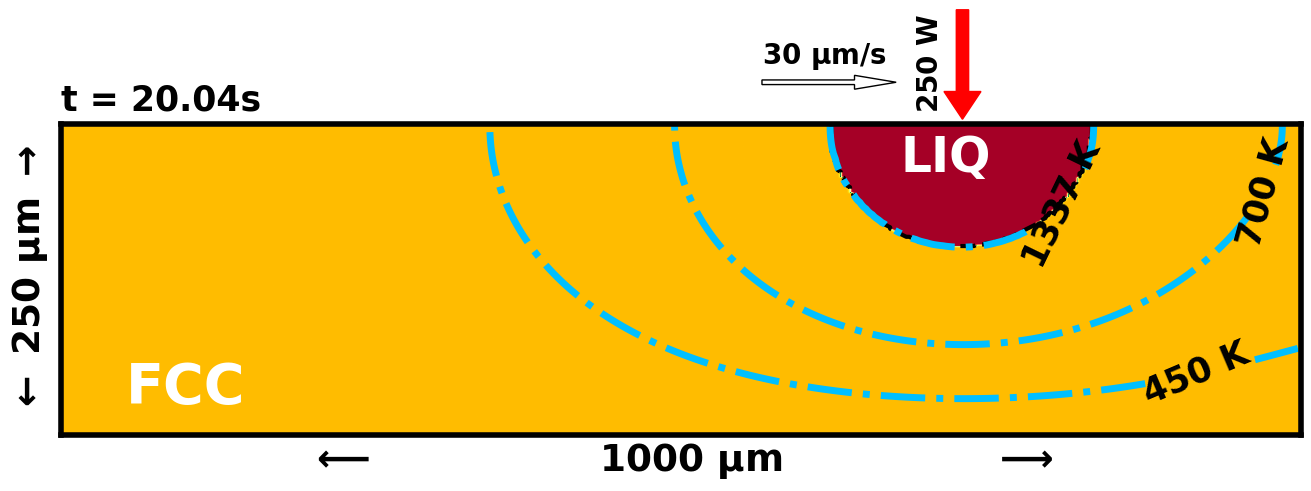

In [8]:
t_step = 399

scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"250 $\mathbf{W}$"

laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_GF[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure

fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

cmap = plt.get_cmap('RdYlGn_r')
cmap.set_under('white', alpha=0)
hmap1 = ax1.imshow(LIQ_GF[:,:,t_step], cmap=cmap, vmin=0.5, vmax=1.0, aspect=0.5,  interpolation='quadric',)

cmap = plt.get_cmap('Wistia')
# cmap = cold2hot
cmap.set_under('white', alpha=0) 
hmap2 = ax1.imshow(FCC_GF[:,:,t_step], cmap=cmap, vmin=0.5, vmax=1.5, aspect=0.5, interpolation='quadric',)

contour_level_LIQ = [0.8]
contour_LIQ = plt.contour(LIQ_GF[:, :, t_step], levels=contour_level_LIQ, colors='k', linestyles='--', linewidths=3,)

contour_levels = [450, 700,  1337]
contour = ax1.contour(temp_GF[:, :, t_step], levels=contour_levels, colors='deepskyblue', linewidths=5, linestyles='dashdot')
clabels = ax1.clabel(contour, inline=True, fontsize=25, colors='k', fmt='%1.0f K')
for label in clabels: label.set_fontweight('bold')
    
if timeS_GF[t_step] <= 25:
    ax1.arrow(laser_pos,-75, 0, 71,  width = 4, color='red', length_includes_head=True, clip_on=False)
    ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
    if laser_act_pos < 500:
        ax1.set_title(f't = {timeS_GF[t_step]:.2f}s', pad=10, loc='right', fontsize=25, weight='bold')
        ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
    else:
        ax1.set_title(f't = {timeS_GF[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
        ax1.text(laser_pos-65, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos-65, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
else:
    ax1.set_title(f't = {timeS_GF[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
    ax1.text(350, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.text(350, -20, "OFF", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.arrow(400, -10, -50, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
    ax1.arrow(350, -75, 0, 71,  width = 4, color='none', length_includes_head=True, clip_on=False) # to make the figure height same after laser is turned off

    
AuFCC_txt = ax1.text(20,180,'FCC', fontsize = 40, weight='bold', color='white')
if timeS_GF[t_step] <= 25:
    AuLIQ_txt = ax1.text(laser_pos-20, 30,'LIQ', fontsize = 35, weight='bold', color='white')


ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,401)

################## Dimensions ###################
ax1.set_xlabel('$\mathbf{\longleftarrow}$                 1000 $ \mathbf{\mu m}$                $\mathbf{\longrightarrow}$', fontsize = 27, weight ='bold',)
ax1.annotate(r'$\mathbf{\leftarrow}$ 250 $\mathbf{\mu m}$ $\mathbf{\rightarrow}$', xy=(0.5, 0.5), xytext=(-0.025, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 27, weight = 'bold', color='k', ha='center', va='center')

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(4)
# ax1.add_patch(patches.Rectangle((-1, -1), 402, 202, linewidth=4, edgecolor='k', facecolor='none'))

# plt.savefig('../../figures/Phase_GaussianFIT.png',bbox_inches='tight', dpi=800)
plt.show()

### Temperature

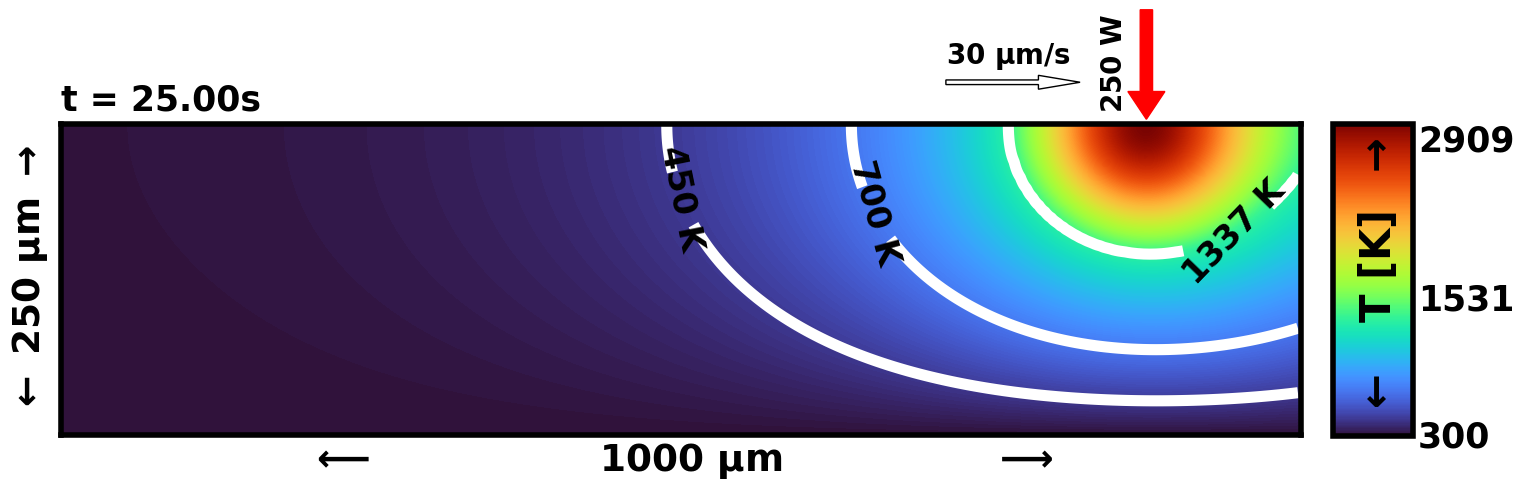

In [10]:
t_step = 482

scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"250 $\mathbf{W}$"

laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_GF[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure

fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

hmap1 = ax1.imshow(temp_GF[:,:,t_step], cmap='turbo', vmin=300, aspect=0.5,  interpolation='quadric')

if timeS_GF[t_step] <= 25:
    ax1.arrow(laser_pos,-75, 0, 71,  width = 4, color='red', length_includes_head=True, clip_on=False)
    ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
    if laser_act_pos < 500:
        ax1.set_title(f't = {timeS_GF[t_step]:.2f}s', pad=10, loc='right', fontsize=25, weight='bold')
        ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
    else:
        ax1.set_title(f't = {timeS_GF[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
        ax1.text(laser_pos-65, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos-65, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
else:
    ax1.set_title(f't = {timeS_GF[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
    ax1.text(350, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.text(350, -20, "OFF", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.arrow(400, -10, -50, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
    ax1.arrow(350, -75, 0, 71,  width = 4, color='none', length_includes_head=True, clip_on=False) # to make the figure height same after laser is turned off

ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,401)

contour_levels = [450, 700,  1337]
contour = plt.contour(temp_GF[:, :, t_step], levels=contour_levels, colors='white', linewidths=8,)
clabels = plt.clabel(contour, inline=True, fontsize=24, colors='k', fmt='%1.0f K')
for label in clabels: label.set_fontweight('bold')

################## Dimensions ###################
ax1.set_xlabel('$\mathbf{\longleftarrow}$                 1000 $ \mathbf{\mu m}$                $\mathbf{\longrightarrow}$', fontsize = 27, weight ='bold',)
ax1.annotate(r'$\mathbf{\leftarrow}$ 250 $\mathbf{\mu m}$ $\mathbf{\rightarrow}$', xy=(0.5, 0.5), xytext=(-0.025, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 27, weight = 'bold', color='k', ha='center', va='center')

############## Color Bar ###########
ax2 = fig.add_axes([0.92, 0.3, 0.05, 0.39]) 
ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
# cbar.set_label(r'$\mathbf{\leftarrow}$   T [K]  $\mathbf{\rightarrow}$', color='k',  labelpad=-115, fontsize=30, rotation=90, weight='bold')
text = Text(x=0.935, y=0.335, text=r'$\mathbf{\leftarrow}$   T [K]  $\mathbf{\rightarrow}$', fontsize=30, color='k', rotation=90, weight='bold')
fig.add_artist(text)

if timeS_GF[t_step] <= 25:
    cbar.set_ticks([np.min(temp_GF[:,:,t_step])*1.06, (np.max(temp_GF[:,:,t_step]))/2, np.max(temp_GF[:,:,t_step])*0.96], labels=[f'{np.min(temp_GF[:,:,t_step]):.0f}', f'{np.max(temp_GF[:,:,t_step])/2 :.0f}', f'{np.max(temp_GF[:,:,t_step])*0.95:.0f}'], weight='bold') 
else:
    cbar.set_ticks([np.min(temp_GF[:,:,t_step]), (np.max(temp_GF[:,:,t_step])+np.min(temp_GF[:,:,t_step]))/2, np.max(temp_GF[:,:,t_step])], labels=[f'{np.min(temp_GF[:,:,t_step]):.0f}', f'{(np.max(temp_GF[:,:,t_step])+np.min(temp_GF[:,:,t_step]))/2 :.0f}', f'{np.max(temp_GF[:,:,t_step]):.0f}'], weight='bold') 


ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(4)
ax1.spines[:].set_color('k')
ax2.spines[:].set_linewidth(4)
line = Line2D([1.04, 1.04], [0.35, 0.65], transform=fig.transFigure, color="none", linewidth=3, linestyle='-')
fig.add_artist(line)

# plt.savefig('../../figures/Temp_GaussianFIT.png',bbox_inches='tight', dpi=800)
plt.show()

### Velocity

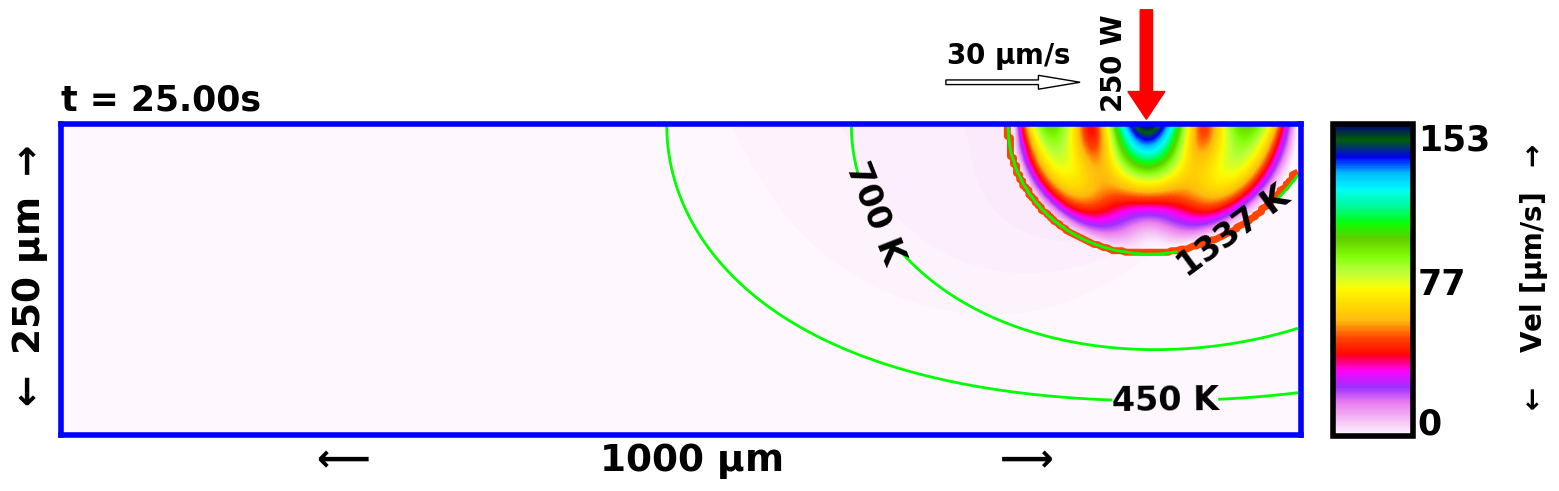

In [11]:
t_step = 482

scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"250 $\mathbf{W}$"

laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_GF[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure


fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))


hmap1 = ax1.imshow(vel_GF[:,:,t_step], cmap='gist_ncar_r', vmin=2, aspect=0.5,  interpolation='bilinear')
# AuFCC_txt = ax1.text(320,180,'FCC', fontsize = 35, weight='bold', color='green')
# AuLIQ_txt = ax1.text(laser_pos-20, 30,'LIQ', fontsize = 35, weight='bold', color='white')

######################### Laser Arrow ###########################
if timeS_GF[t_step] <= 25:
    ax1.arrow(laser_pos,-75, 0, 71,  width = 4, color='red', length_includes_head=True, clip_on=False)
    ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
    if laser_act_pos < 500:
        ax1.set_title(f't = {timeS_GF[t_step]:.2f}s', pad=10, loc='right', fontsize=25, weight='bold')
        ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
    else:
        ax1.set_title(f't = {timeS_GF[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
        ax1.text(laser_pos-65, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos-65, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
else:
    ax1.set_title(f't = {timeS_GF[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
    ax1.text(350, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.text(350, -20, "OFF", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.arrow(400, -10, -50, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
    ax1.arrow(350, -75, 0, 71,  width = 4, color='none', length_includes_head=True, clip_on=False) # to make the figure height same after laser is turned off
    
contour_level_LIQ = [0.8]
contour_LIQ = plt.contour(LIQ_GF[:, :, t_step], levels=contour_level_LIQ, colors='orangered', linestyles='-', linewidths=5,)

contour_levels = [450, 700, 1337]
contour = plt.contour(temp_GF[:, :, t_step], levels=contour_levels, colors='lime', linewidths=2,)
clabels = plt.clabel(contour, inline=True, fontsize=24, colors='k', fmt='%1.0f K')

ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,401)

for label in clabels: label.set_fontweight('bold')
    
################## Dimensions ###################
ax1.set_xlabel('$\mathbf{\longleftarrow}$                 1000 $ \mathbf{\mu m}$                $\mathbf{\longrightarrow}$', fontsize = 27, weight ='bold',)
ax1.annotate(r'$\mathbf{\leftarrow}$ 250 $\mathbf{\mu m}$ $\mathbf{\rightarrow}$', xy=(0.5, 0.5), xytext=(-0.025, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 27, weight = 'bold', color='k', ha='center', va='center')

############## Color Bar ###########
ax2 = fig.add_axes([0.92, 0.3, 0.05, 0.39]) 
ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
cbar.set_label(r'$\mathbf{\leftarrow}$   Vel $\mathbf{[\mu m/s]}$  $\mathbf{\rightarrow}$', color='k',  labelpad=20, fontsize=20, rotation=90, weight='bold')
cbar.set_ticks([np.max(vel_GF[:,:,t_step])*0.06, (np.max(vel_GF[:,:,t_step]))/2, np.max(vel_GF[:,:,t_step])*0.96], labels=[f'{np.min(vel_GF[:,:,t_step]):.0f}', f'{np.max(vel_GF[:,:,t_step])/2 :.0f}', f'{np.max(vel_GF[:,:,t_step]):.0f}'], weight='bold') 

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(4)
ax1.spines[:].set_color('b')
ax2.spines[:].set_linewidth(4)
line = Line2D([1.041, 1.041], [0.35, 0.65], transform=fig.transFigure, color="none", linewidth=3, linestyle='-')
fig.add_artist(line)

# plt.savefig('../../figures/Vel_GaussianFIT.png',bbox_inches='tight', dpi=800)
plt.show()

# Flat Top

## TDB

In [12]:
model_FlatTopTDB = np.load(path+'/FlatTop/TDB/FlatTop_TDB.npz')

LIQ_FT     = model_FlatTopTDB['arr1']
FCC_FT     = model_FlatTopTDB['arr2']
vel_FT     = model_FlatTopTDB['arr3']
temp_FT    = model_FlatTopTDB['arr4']
timeS_FT   = model_FlatTopTDB['arr5']

time_steps_FT =  timeS_FT.shape[0]

### Phases

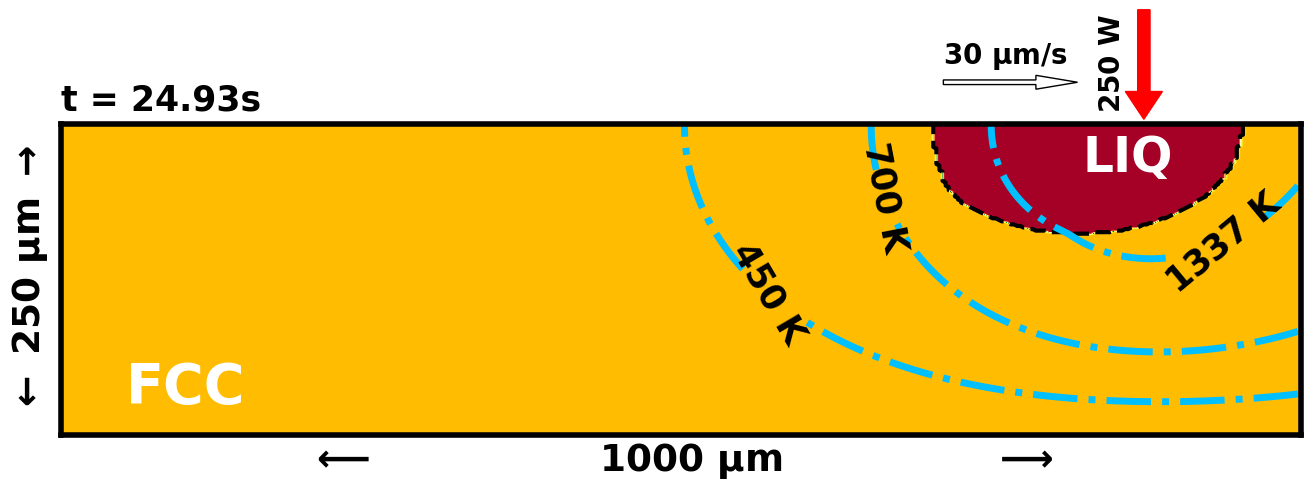

In [14]:
t_step = 440

scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"250 $\mathbf{W}$"

laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_FT[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure

fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))
cmap = plt.get_cmap('RdYlGn_r')
cmap.set_under('white', alpha=0)
hmap1 = ax1.imshow(LIQ_FT[:,:,t_step], cmap=cmap, vmin=0.5, vmax=1.0, aspect=0.5,  interpolation='quadric')

cmap = plt.get_cmap('Wistia')
# cmap = cold2hot
cmap.set_under('white', alpha=0) 
hmap2 = ax1.imshow(FCC_FT[:,:,t_step], cmap=cmap, vmin=0.5, vmax=1.5, aspect=0.5, interpolation='quadric')

contour_level_LIQ = [0.8]
contour_LIQ = plt.contour(LIQ_FT[:, :, t_step], levels=contour_level_LIQ, colors='k', linestyles='--', linewidths=3,)

contour_levels = [450, 700,  1337]
contour = ax1.contour(temp_FT[:, :, t_step], levels=contour_levels, colors='deepskyblue', linewidths=5, linestyles='dashdot')
clabels = ax1.clabel(contour, inline=True, fontsize=25, colors='k', fmt='%1.0f K')
for label in clabels: label.set_fontweight('bold')
    
if timeS_FT[t_step] <= 25:
    ax1.arrow(laser_pos,-75, 0, 71,  width = 4, color='red', length_includes_head=True, clip_on=False)
    ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
    if laser_act_pos < 500:
        ax1.set_title(f't = {timeS_FT[t_step]:.2f}s', pad=10, loc='right', fontsize=25, weight='bold')
        ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
    else:
        ax1.set_title(f't = {timeS_FT[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
        ax1.text(laser_pos-65, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos-65, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
else:
    ax1.set_title(f't = {timeS_FT[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
    ax1.text(350, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.text(350, -20, "OFF", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.arrow(400, -10, -50, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
    ax1.arrow(350, -75, 0, 71,  width = 4, color='none', length_includes_head=True, clip_on=False) # to make the figure height same after laser is turned off

    
AuFCC_txt = ax1.text(20,180,'FCC', fontsize = 40, weight='bold', color='white')

if timeS_FT[t_step] <= 25:
    AuLIQ_txt = ax1.text(laser_pos-20, 30,'LIQ', fontsize = 35, weight='bold', color='white')



ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,401)

################## Dimensions ###################
ax1.set_xlabel('$\mathbf{\longleftarrow}$                 1000 $ \mathbf{\mu m}$                $\mathbf{\longrightarrow}$', fontsize = 27, weight ='bold',)
ax1.annotate(r'$\mathbf{\leftarrow}$ 250 $\mathbf{\mu m}$ $\mathbf{\rightarrow}$', xy=(0.5, 0.5), xytext=(-0.025, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 27, weight = 'bold', color='k', ha='center', va='center')

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(4)
# ax1.add_patch(patches.Rectangle((-1, -1), 402, 202, linewidth=4, edgecolor='k', facecolor='none'))

plt.show()

### Temperature

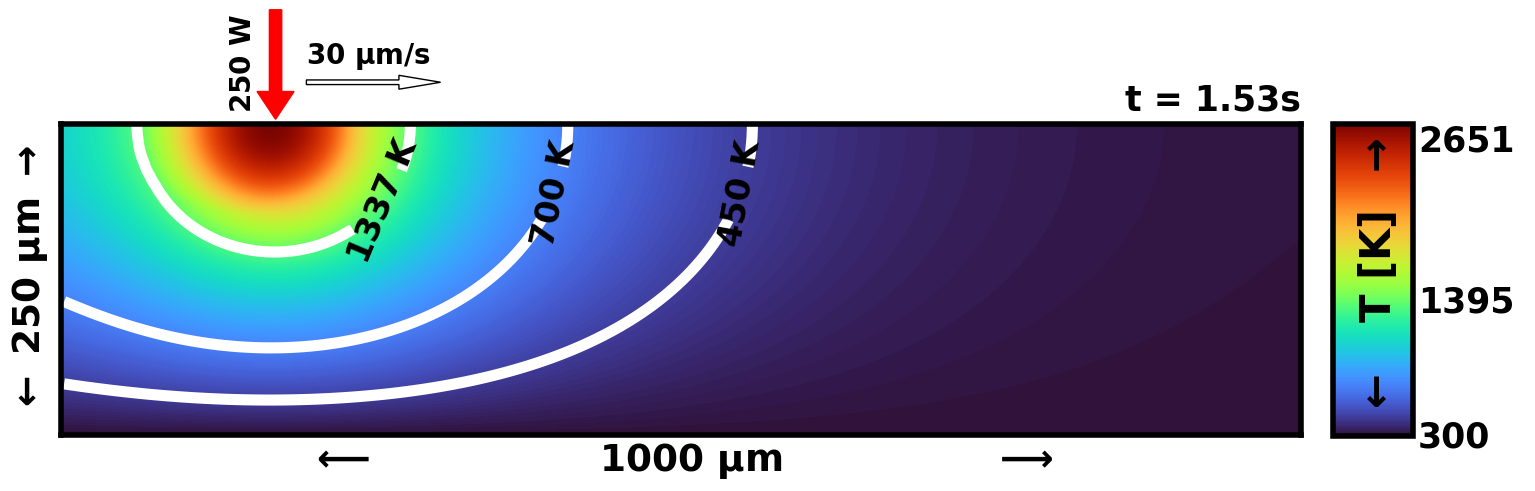

In [15]:
t_step = 50

scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"250 $\mathbf{W}$"

laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_FT[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure

fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=True)
ax1.set_facecolor((0, 0, 0, 0))

hmap1 = ax1.imshow(temp_FT[:,:,t_step], cmap='turbo', vmin=300, aspect=0.5,  interpolation='quadric')

if timeS_FT[t_step] <= 25:
    ax1.arrow(laser_pos,-75, 0, 71,  width = 4, color='red', length_includes_head=True, clip_on=False)
    ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
    if laser_act_pos < 500:
        ax1.set_title(f't = {timeS_FT[t_step]:.2f}s', pad=10, loc='right', fontsize=25, weight='bold')
        ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
    else:
        ax1.set_title(f't = {timeS_FT[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
        ax1.text(laser_pos-65, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos-65, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
else:
    ax1.set_title(f't = {timeS_FT[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
    ax1.text(350, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.text(350, -20, "OFF", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.arrow(400, -10, -50, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
    ax1.arrow(350, -75, 0, 71,  width = 4, color='none', length_includes_head=True, clip_on=False) # to make the figure height same after laser is turned off

ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,401)

contour_levels = [450, 700,  1337]
contour = plt.contour(temp_FT[:, :, t_step], levels=contour_levels, colors='white', linewidths=8,)
clabels = plt.clabel(contour, inline=True, fontsize=24, colors='k', fmt='%1.0f K')
for label in clabels: label.set_fontweight('bold')

################## Dimensions ###################
ax1.set_xlabel('$\mathbf{\longleftarrow}$                 1000 $ \mathbf{\mu m}$                $\mathbf{\longrightarrow}$', fontsize = 27, weight ='bold',)
ax1.annotate(r'$\mathbf{\leftarrow}$ 250 $\mathbf{\mu m}$ $\mathbf{\rightarrow}$', xy=(0.5, 0.5), xytext=(-0.025, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 27, weight = 'bold', color='k', ha='center', va='center')

############## Color Bar ###########
ax2 = fig.add_axes([0.92, 0.3, 0.05, 0.39]) 
ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
# cbar.set_label(r'$\mathbf{\leftarrow}$   T [K]  $\mathbf{\rightarrow}$', color='k',  labelpad=-115, fontsize=30, rotation=90, weight='bold')
text = Text(x=0.935, y=0.335, text=r'$\mathbf{\leftarrow}$   T [K]  $\mathbf{\rightarrow}$', fontsize=30, color='k', rotation=90, weight='bold')
fig.add_artist(text)

if timeS_FT[t_step] <= 25:
    cbar.set_ticks([np.min(temp_FT[:,:,t_step])*1.06, (np.max(temp_FT[:,:,t_step]))/2, np.max(temp_FT[:,:,t_step])*0.96], labels=[f'{np.min(temp_FT[:,:,t_step]):.0f}', f'{np.max(temp_FT[:,:,t_step])/2 :.0f}', f'{np.max(temp_FT[:,:,t_step])*0.95:.0f}'], weight='bold') 
else:
    cbar.set_ticks([np.min(temp_FT[:,:,t_step]), (np.max(temp_FT[:,:,t_step])+np.min(temp_FT[:,:,t_step]))/2, np.max(temp_FT[:,:,t_step])], labels=[f'{np.min(temp_FT[:,:,t_step]):.0f}', f'{(np.max(temp_FT[:,:,t_step])+np.min(temp_FT[:,:,t_step]))/2 :.0f}', f'{np.max(temp_FT[:,:,t_step]):.0f}'], weight='bold') 

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(4)
ax1.spines[:].set_color('k')
ax2.spines[:].set_linewidth(4)
line = Line2D([1.04, 1.04], [0.35, 0.65], transform=fig.transFigure, color="none", linewidth=3, linestyle='-')
fig.add_artist(line)

plt.show()

### Velocity

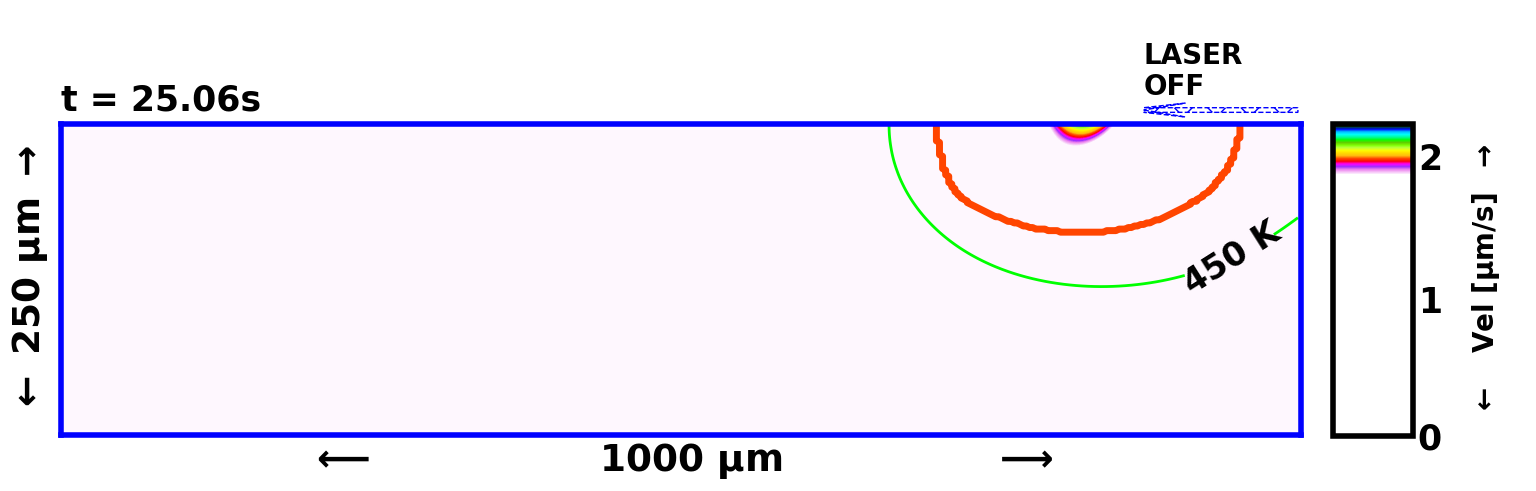

In [20]:
t_step = 444

scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"250 $\mathbf{W}$"

laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_FT[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure


fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=True)
ax1.set_facecolor((0, 0, 0, 0))


hmap1 = ax1.imshow(vel_FT[:,:,t_step], cmap='gist_ncar_r', vmin=2, aspect=0.5,  interpolation='bilinear')
# AuFCC_txt = ax1.text(320,180,'FCC', fontsize = 35, weight='bold', color='green')
# AuLIQ_txt = ax1.text(laser_pos-20, 30,'LIQ', fontsize = 35, weight='bold', color='white')

######################### Laser Arrow ###########################
if timeS_FT[t_step] <= 25:
    ax1.arrow(laser_pos,-75, 0, 71,  width = 4, color='red', length_includes_head=True, clip_on=False)
    ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
    if laser_act_pos < 500:
        ax1.set_title(f't = {timeS_FT[t_step]:.2f}s', pad=10, loc='right', fontsize=25, weight='bold')
        ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
    else:
        ax1.set_title(f't = {timeS_FT[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
        ax1.text(laser_pos-65, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos-65, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
else:
    ax1.set_title(f't = {timeS_FT[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
    ax1.text(350, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.text(350, -20, "OFF", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.arrow(400, -10, -50, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
    ax1.arrow(350, -75, 0, 71,  width = 4, color='none', length_includes_head=True, clip_on=False) # to make the figure height same after laser is turned off
    
contour_level_LIQ = [0.8]
contour_LIQ = plt.contour(LIQ_FT[:, :, t_step], levels=contour_level_LIQ, colors='orangered', linestyles='-', linewidths=5,)

contour_levels = [450, 700, 1337]
contour = plt.contour(temp_FT[:, :, t_step], levels=contour_levels, colors='lime', linewidths=2,)
clabels = plt.clabel(contour, inline=True, fontsize=24, colors='k', fmt='%1.0f K')

ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,401)

for label in clabels: label.set_fontweight('bold')
    
################## Dimensions ###################
ax1.set_xlabel('$\mathbf{\longleftarrow}$                 1000 $ \mathbf{\mu m}$                $\mathbf{\longrightarrow}$', fontsize = 27, weight ='bold',)
ax1.annotate(r'$\mathbf{\leftarrow}$ 250 $\mathbf{\mu m}$ $\mathbf{\rightarrow}$', xy=(0.5, 0.5), xytext=(-0.025, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 27, weight = 'bold', color='k', ha='center', va='center')

############## Color Bar ###########
ax2 = fig.add_axes([0.92, 0.3, 0.05, 0.39]) 
ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
cbar.set_label(r'$\mathbf{\leftarrow}$   Vel $\mathbf{[\mu m/s]}$  $\mathbf{\rightarrow}$', color='k',  labelpad=20, fontsize=20, rotation=90, weight='bold')
cbar.set_ticks([np.max(vel_FT[:,:,t_step])*0.06, (np.max(vel_FT[:,:,t_step]))/2, np.max(vel_FT[:,:,t_step])*0.96], labels=[f'{np.min(vel_FT[:,:,t_step]):.0f}', f'{np.max(vel_FT[:,:,t_step])/2 :.0f}', f'{np.max(vel_FT[:,:,t_step]):.0f}'], weight='bold') 

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(4)
ax1.spines[:].set_color('b')
ax2.spines[:].set_linewidth(4)
line = Line2D([1.041, 1.041], [0.35, 0.65], transform=fig.transFigure, color="none", linewidth=3, linestyle='-')
fig.add_artist(line)

plt.show()

## Fitting

In [21]:
model_FlatTopFitting = np.load(path+'/FlatTop/Fitting/FlatTop_Fitting.npz')

LIQ_FF     = model_FlatTopFitting['arr1']
FCC_FF     = model_FlatTopFitting['arr2']
vel_FF     = model_FlatTopFitting['arr3']
temp_FF    = model_FlatTopFitting['arr4']
timeS_FF  = model_FlatTopFitting['arr5']

time_steps =  timeS_FF.shape[0]

### Phases

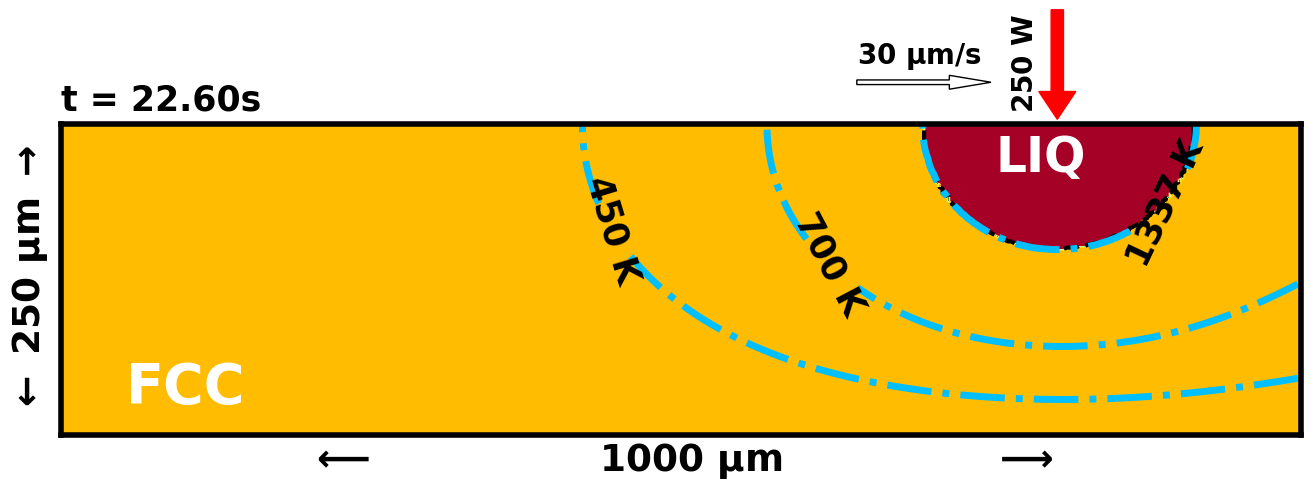

In [22]:
t_step = 440

scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"250 $\mathbf{W}$"

laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_FF[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure

fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))
cmap = plt.get_cmap('RdYlGn_r')
cmap.set_under('white', alpha=0)
hmap1 = ax1.imshow(LIQ_FF[:,:,t_step], cmap=cmap, vmin=0.5, vmax=1.0, aspect=0.5,  interpolation='quadric')

cmap = plt.get_cmap('Wistia')
# cmap = cold2hot
cmap.set_under('white', alpha=0) 
hmap2 = ax1.imshow(FCC_FF[:,:,t_step], cmap=cmap, vmin=0.5, vmax=1.5, aspect=0.5, interpolation='quadric')

contour_level_LIQ = [0.8]
contour_LIQ = plt.contour(LIQ_FF[:, :, t_step], levels=contour_level_LIQ, colors='k', linestyles='--', linewidths=3,)

contour_levels = [450, 700,  1337]
contour = ax1.contour(temp_FF[:, :, t_step], levels=contour_levels, colors='deepskyblue', linewidths=5, linestyles='dashdot')
clabels = ax1.clabel(contour, inline=True, fontsize=25, colors='k', fmt='%1.0f K')
for label in clabels: label.set_fontweight('bold')
    
if timeS_FF[t_step] <= 25:
    ax1.arrow(laser_pos,-75, 0, 71,  width = 4, color='red', length_includes_head=True, clip_on=False)
    ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
    if laser_act_pos < 500:
        ax1.set_title(f't = {timeS_FF[t_step]:.2f}s', pad=10, loc='right', fontsize=25, weight='bold')
        ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
    else:
        ax1.set_title(f't = {timeS_FF[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
        ax1.text(laser_pos-65, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos-65, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
else:
    ax1.set_title(f't = {timeS_FF[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
    ax1.text(350, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.text(350, -20, "OFF", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.arrow(400, -10, -50, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
    ax1.arrow(350, -75, 0, 71,  width = 4, color='none', length_includes_head=True, clip_on=False) # to make the figure height same after laser is turned off

    
AuFCC_txt = ax1.text(20,180,'FCC', fontsize = 40, weight='bold', color='white')
if timeS_FF[t_step] <= 25:
    AuLIQ_txt = ax1.text(laser_pos-20, 30,'LIQ', fontsize = 35, weight='bold', color='white')

ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,401)

################## Dimensions ###################
ax1.set_xlabel('$\mathbf{\longleftarrow}$                 1000 $ \mathbf{\mu m}$                $\mathbf{\longrightarrow}$', fontsize = 27, weight ='bold',)
ax1.annotate(r'$\mathbf{\leftarrow}$ 250 $\mathbf{\mu m}$ $\mathbf{\rightarrow}$', xy=(0.5, 0.5), xytext=(-0.025, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 27, weight = 'bold', color='k', ha='center', va='center')

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(4)
# ax1.add_patch(patches.Rectangle((-1, -1), 402, 202, linewidth=4, edgecolor='k', facecolor='none'))

plt.show()

### Temperature

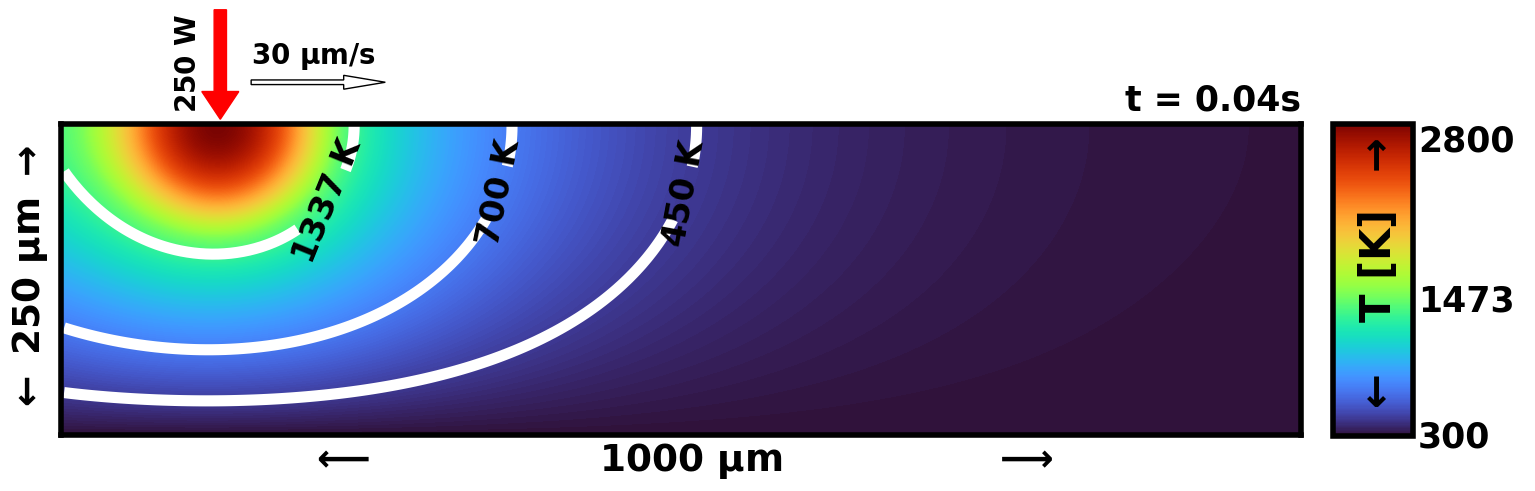

In [23]:
t_step = 50

scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"250 $\mathbf{W}$"

laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_FF[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure

fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

hmap1 = ax1.imshow(temp_FF[:,:,t_step], cmap='turbo', vmin=300, aspect=0.5,  interpolation='quadric')

if timeS_FF[t_step] <= 25:
    ax1.arrow(laser_pos,-75, 0, 71,  width = 4, color='red', length_includes_head=True, clip_on=False)
    ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
    if laser_act_pos < 500:
        ax1.set_title(f't = {timeS_FF[t_step]:.2f}s', pad=10, loc='right', fontsize=25, weight='bold')
        ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
    else:
        ax1.set_title(f't = {timeS_FF[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
        ax1.text(laser_pos-65, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos-65, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
else:
    ax1.set_title(f't = {timeS_FF[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
    ax1.text(350, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.text(350, -20, "OFF", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.arrow(400, -10, -50, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
    ax1.arrow(350, -75, 0, 71,  width = 4, color='none', length_includes_head=True, clip_on=False) # to make the figure height same after laser is turned off

ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,401)

contour_levels = [450, 700,  1337]
contour = plt.contour(temp_FF[:, :, t_step], levels=contour_levels, colors='white', linewidths=8,)
clabels = plt.clabel(contour, inline=True, fontsize=24, colors='k', fmt='%1.0f K')
for label in clabels: label.set_fontweight('bold')

################## Dimensions ###################
ax1.set_xlabel('$\mathbf{\longleftarrow}$                 1000 $ \mathbf{\mu m}$                $\mathbf{\longrightarrow}$', fontsize = 27, weight ='bold',)
ax1.annotate(r'$\mathbf{\leftarrow}$ 250 $\mathbf{\mu m}$ $\mathbf{\rightarrow}$', xy=(0.5, 0.5), xytext=(-0.025, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 27, weight = 'bold', color='k', ha='center', va='center')

############## Color Bar ###########
ax2 = fig.add_axes([0.92, 0.3, 0.05, 0.39]) 
ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
# cbar.set_label(r'$\mathbf{\leftarrow}$   T [K]  $\mathbf{\rightarrow}$', color='k',  labelpad=-115, fontsize=30, rotation=90, weight='bold')
text = Text(x=0.935, y=0.335, text=r'$\mathbf{\leftarrow}$   T [K]  $\mathbf{\rightarrow}$', fontsize=30, color='k', rotation=90, weight='bold')
fig.add_artist(text)

if timeS_FF[t_step] <= 25:
    cbar.set_ticks([np.min(temp_FF[:,:,t_step])*1.06, (np.max(temp_FF[:,:,t_step]))/2, np.max(temp_FF[:,:,t_step])*0.96], labels=[f'{np.min(temp_FF[:,:,t_step]):.0f}', f'{np.max(temp_FF[:,:,t_step])/2 :.0f}', f'{np.max(temp_FF[:,:,t_step])*0.95:.0f}'], weight='bold') 
else:
    cbar.set_ticks([np.min(temp_FF[:,:,t_step]), (np.max(temp_FF[:,:,t_step])+np.min(temp_FF[:,:,t_step]))/2, np.max(temp_FF[:,:,t_step])], labels=[f'{np.min(temp_FF[:,:,t_step]):.0f}', f'{(np.max(temp_FF[:,:,t_step])+np.min(temp_FF[:,:,t_step]))/2 :.0f}', f'{np.max(temp_FF[:,:,t_step]):.0f}'], weight='bold') 


ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(4)
ax1.spines[:].set_color('k')
ax2.spines[:].set_linewidth(4)
line = Line2D([1.04, 1.04], [0.35, 0.65], transform=fig.transFigure, color="none", linewidth=3, linestyle='-')
fig.add_artist(line)

plt.show()

### Velocity

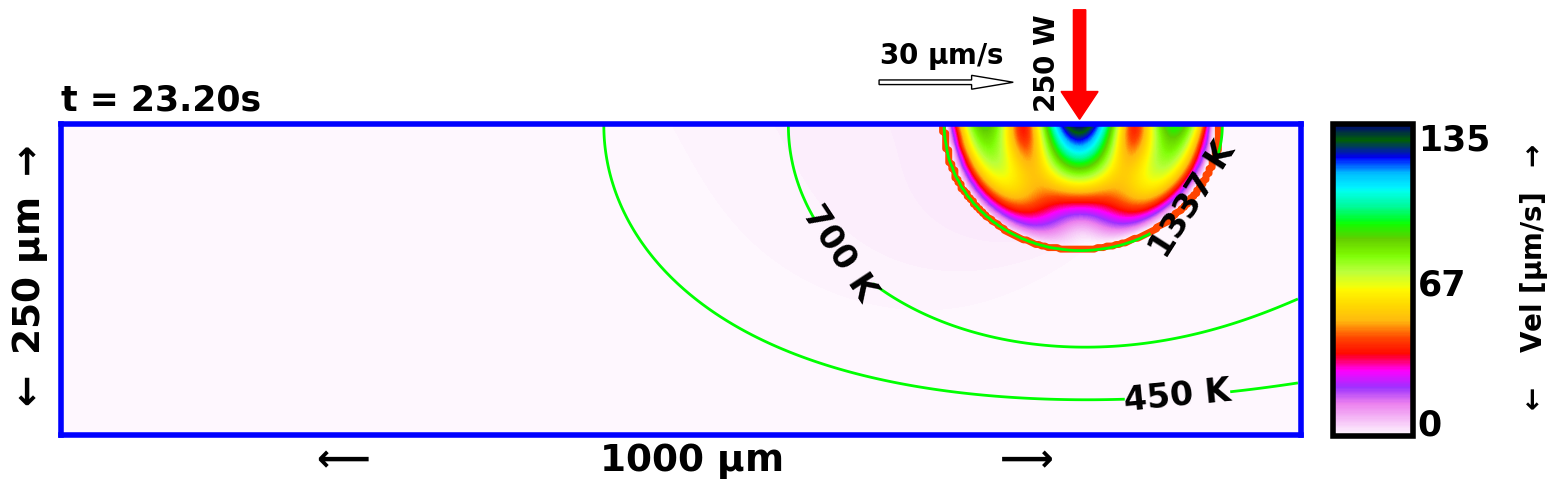

In [24]:
t_step = 450

scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"250 $\mathbf{W}$"

laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_FF[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure


fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=True)
ax1.set_facecolor((0, 0, 0, 0))


hmap1 = ax1.imshow(vel_FF[:,:,t_step], cmap='gist_ncar_r', vmin=2, aspect=0.5,  interpolation='bilinear')
# AuFCC_txt = ax1.text(320,180,'FCC', fontsize = 35, weight='bold', color='green')
# AuLIQ_txt = ax1.text(laser_pos-20, 30,'LIQ', fontsize = 35, weight='bold', color='white')

######################### Laser Arrow ###########################
if timeS_FF[t_step] <= 25:
    ax1.arrow(laser_pos,-75, 0, 71,  width = 4, color='red', length_includes_head=True, clip_on=False)
    ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
    if laser_act_pos < 500:
        ax1.set_title(f't = {timeS_FF[t_step]:.2f}s', pad=10, loc='right', fontsize=25, weight='bold')
        ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
    else:
        ax1.set_title(f't = {timeS_FF[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
        ax1.text(laser_pos-65, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos-65, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
else:
    ax1.set_title(f't = {timeS_FF[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
    ax1.text(350, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.text(350, -20, "OFF", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.arrow(400, -10, -50, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
    ax1.arrow(350, -75, 0, 71,  width = 4, color='none', length_includes_head=True, clip_on=False) # to make the figure height same after laser is turned off
    
contour_level_LIQ = [0.8]
contour_LIQ = plt.contour(LIQ_FF[:, :, t_step], levels=contour_level_LIQ, colors='orangered', linestyles='-', linewidths=5,)

contour_levels = [450, 700, 1337]
contour = plt.contour(temp_FF[:, :, t_step], levels=contour_levels, colors='lime', linewidths=2,)
clabels = plt.clabel(contour, inline=True, fontsize=24, colors='k', fmt='%1.0f K')

ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,401)

for label in clabels: label.set_fontweight('bold')
    
################## Dimensions ###################
ax1.set_xlabel('$\mathbf{\longleftarrow}$                 1000 $ \mathbf{\mu m}$                $\mathbf{\longrightarrow}$', fontsize = 27, weight ='bold',)
ax1.annotate(r'$\mathbf{\leftarrow}$ 250 $\mathbf{\mu m}$ $\mathbf{\rightarrow}$', xy=(0.5, 0.5), xytext=(-0.025, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 27, weight = 'bold', color='k', ha='center', va='center')

############## Color Bar ###########
ax2 = fig.add_axes([0.92, 0.3, 0.05, 0.39]) 
ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
cbar.set_label(r'$\mathbf{\leftarrow}$   Vel $\mathbf{[\mu m/s]}$  $\mathbf{\rightarrow}$', color='k',  labelpad=20, fontsize=20, rotation=90, weight='bold')
cbar.set_ticks([np.max(vel_FF[:,:,t_step])*0.06, (np.max(vel_FF[:,:,t_step]))/2, np.max(vel_FF[:,:,t_step])*0.96], labels=[f'{np.min(vel_FF[:,:,t_step]):.0f}', f'{np.max(vel_FF[:,:,t_step])/2 :.0f}', f'{np.max(vel_FF[:,:,t_step]):.0f}'], weight='bold') 

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(4)
ax1.spines[:].set_color('b')
ax2.spines[:].set_linewidth(4)
line = Line2D([1.041, 1.041], [0.35, 0.65], transform=fig.transFigure, color="none", linewidth=3, linestyle='-')
fig.add_artist(line)

plt.show()

# Ring

## TDB

In [25]:
model_RingTDB = np.load(path+'/Ring/TDB/Ring_TDB.npz')

LIQ_RT     = model_RingTDB['arr1']
FCC_RT     = model_RingTDB['arr2']
vel_RT     = model_RingTDB['arr3']
temp_RT    = model_RingTDB['arr4']
timeS_RT  = model_RingTDB['arr5']

time_steps_RT =  timeS_RT.shape[0]

### Phases

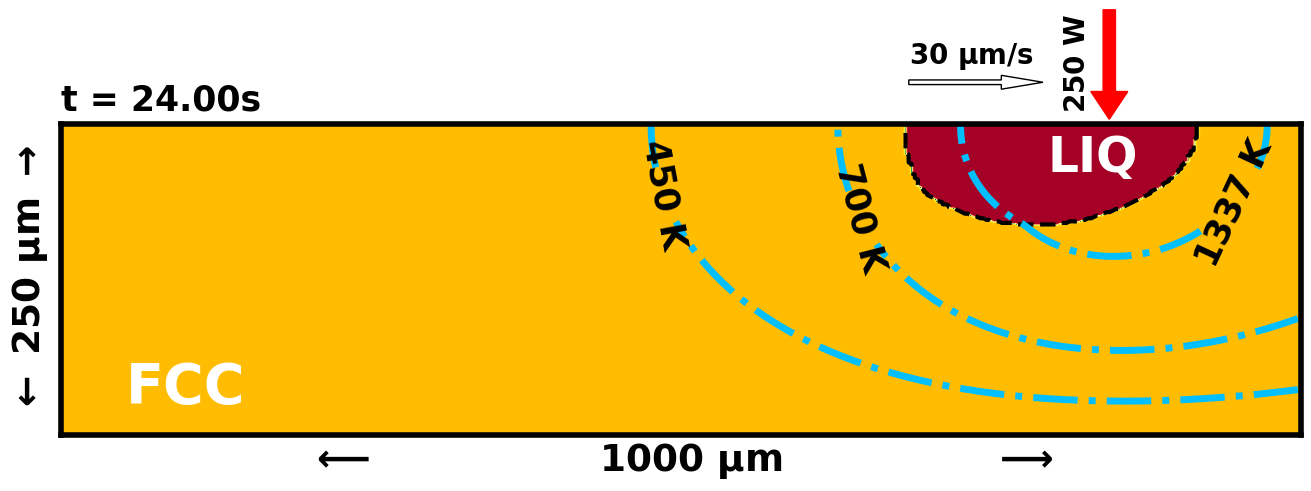

In [26]:
t_step = 400

scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"250 $\mathbf{W}$"

laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_RT[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure

fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

cmap = plt.get_cmap('RdYlGn_r')
cmap.set_under('white', alpha=0)
hmap1 = ax1.imshow(LIQ_RT[:,:,t_step], cmap=cmap, vmin=0.5, vmax=1.0, aspect=0.5,  interpolation='quadric')

cmap = plt.get_cmap('Wistia')
# cmap = cold2hot
cmap.set_under('white', alpha=0) 
hmap2 = ax1.imshow(FCC_RT[:,:,t_step], cmap=cmap, vmin=0.5, vmax=1.5, aspect=0.5, interpolation='quadric')

contour_level_LIQ = [0.8]
contour_LIQ = plt.contour(LIQ_RT[:, :, t_step], levels=contour_level_LIQ, colors='k', linestyles='--', linewidths=3,)

contour_levels = [450, 700,  1337]
contour = ax1.contour(temp_RT[:, :, t_step], levels=contour_levels, colors='deepskyblue', linewidths=5, linestyles='dashdot')
clabels = ax1.clabel(contour, inline=True, fontsize=25, colors='k', fmt='%1.0f K')
for label in clabels: label.set_fontweight('bold')
    
if timeS_RT[t_step] <= 25:
    ax1.arrow(laser_pos,-75, 0, 71,  width = 4, color='red', length_includes_head=True, clip_on=False)
    ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
    if laser_act_pos < 500:
        ax1.set_title(f't = {timeS_RT[t_step]:.2f}s', pad=10, loc='right', fontsize=25, weight='bold')
        ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
    else:
        ax1.set_title(f't = {timeS_RT[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
        ax1.text(laser_pos-65, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos-65, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
else:
    ax1.set_title(f't = {timeS_RT[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
    ax1.text(350, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.text(350, -20, "OFF", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.arrow(400, -10, -50, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
    ax1.arrow(350, -75, 0, 71,  width = 4, color='none', length_includes_head=True, clip_on=False) # to make the figure height same after laser is turned off

    
AuFCC_txt = ax1.text(20,180,'FCC', fontsize = 40, weight='bold', color='white')
if timeS_RT[t_step] <= 25:
    AuLIQ_txt = ax1.text(laser_pos-20, 30,'LIQ', fontsize = 35, weight='bold', color='white')


ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,401)

################## Dimensions ###################
ax1.set_xlabel('$\mathbf{\longleftarrow}$                 1000 $ \mathbf{\mu m}$                $\mathbf{\longrightarrow}$', fontsize = 27, weight ='bold',)
ax1.annotate(r'$\mathbf{\leftarrow}$ 250 $\mathbf{\mu m}$ $\mathbf{\rightarrow}$', xy=(0.5, 0.5), xytext=(-0.025, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 27, weight = 'bold', color='k', ha='center', va='center')

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(4)
# ax1.add_patch(patches.Rectangle((-1, -1), 402, 202, linewidth=4, edgecolor='k', facecolor='none'))

# plt.savefig('../../figures/Phase_RingTDB.png',bbox_inches='tight', dpi=800)
plt.show()

### Temperature

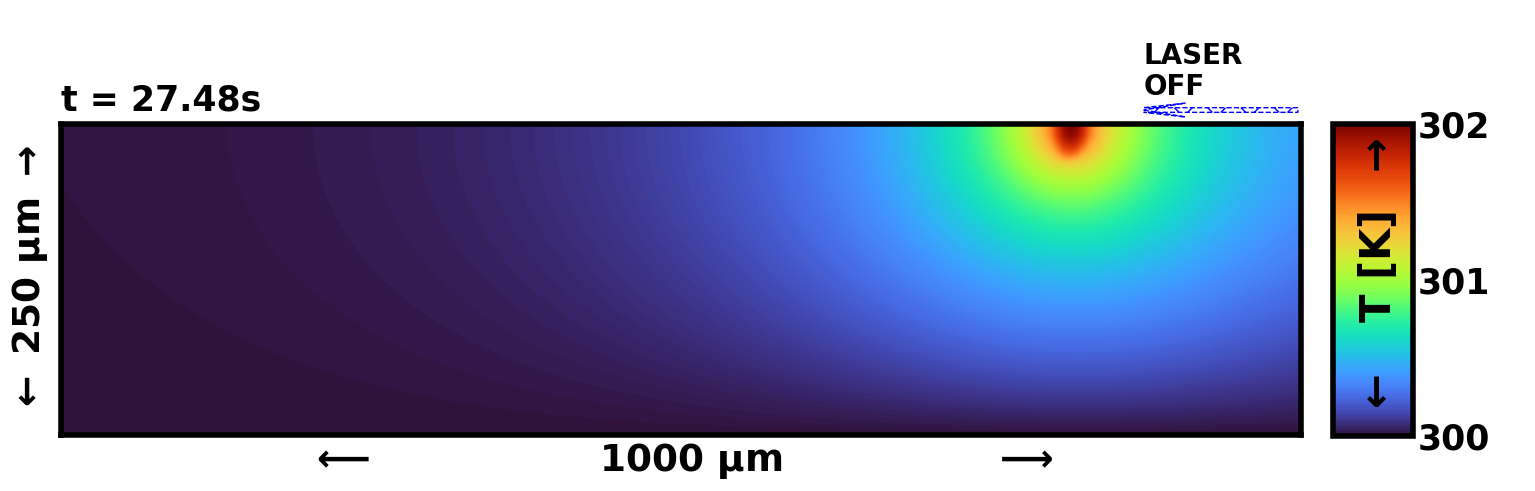

In [27]:
t_step = 500

scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"250 $\mathbf{W}$"

laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_RT[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure

fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

hmap1 = ax1.imshow(temp_RT[:,:,t_step], cmap='turbo', vmin=300, aspect=0.5,  interpolation='quadric')

if timeS_RT[t_step] <= 25:
    ax1.arrow(laser_pos,-75, 0, 71,  width = 4, color='red', length_includes_head=True, clip_on=False)
    ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
    if laser_act_pos < 500:
        ax1.set_title(f't = {timeS_RT[t_step]:.2f}s', pad=10, loc='right', fontsize=25, weight='bold')
        ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
    else:
        ax1.set_title(f't = {timeS_RT[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
        ax1.text(laser_pos-65, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos-65, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
else:
    ax1.set_title(f't = {timeS_RT[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
    ax1.text(350, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.text(350, -20, "OFF", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.arrow(400, -10, -50, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
    ax1.arrow(350, -75, 0, 71,  width = 4, color='none', length_includes_head=True, clip_on=False) # to make the figure height same after laser is turned off

ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,401)

contour_levels = [450, 700,  1337]
contour = plt.contour(temp_RT[:, :, t_step], levels=contour_levels, colors='white', linewidths=8,)
clabels = plt.clabel(contour, inline=True, fontsize=24, colors='tomato', fmt='%1.0f K')
for label in clabels: label.set_fontweight('bold')

################## Dimensions ###################
ax1.set_xlabel('$\mathbf{\longleftarrow}$                 1000 $ \mathbf{\mu m}$                $\mathbf{\longrightarrow}$', fontsize = 27, weight ='bold',)
ax1.annotate(r'$\mathbf{\leftarrow}$ 250 $\mathbf{\mu m}$ $\mathbf{\rightarrow}$', xy=(0.5, 0.5), xytext=(-0.025, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 27, weight = 'bold', color='k', ha='center', va='center')

############## Color Bar ###########
ax2 = fig.add_axes([0.92, 0.3, 0.05, 0.39]) 
ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
# cbar.set_label(r'$\mathbf{\leftarrow}$   T [K]  $\mathbf{\rightarrow}$', color='k',  labelpad=-115, fontsize=30, rotation=90, weight='bold')
text = Text(x=0.935, y=0.335, text=r'$\mathbf{\leftarrow}$   T [K]  $\mathbf{\rightarrow}$', fontsize=30, color='k', rotation=90, weight='bold')
fig.add_artist(text)

if timeS_RT[t_step] <= 25:
    cbar.set_ticks([np.min(temp_RT[:,:,t_step])*1.06, (np.max(temp_RT[:,:,t_step]))/2, np.max(temp_RT[:,:,t_step])*0.96], labels=[f'{np.min(temp_RT[:,:,t_step]):.0f}', f'{np.max(temp_RT[:,:,t_step])/2 :.0f}', f'{np.max(temp_RT[:,:,t_step])*0.95:.0f}'], weight='bold') 
else:
    cbar.set_ticks([np.min(temp_RT[:,:,t_step]), (np.max(temp_RT[:,:,t_step])+np.min(temp_RT[:,:,t_step]))/2, np.max(temp_RT[:,:,t_step])], labels=[f'{np.min(temp_RT[:,:,t_step]):.0f}', f'{(np.max(temp_RT[:,:,t_step])+np.min(temp_RT[:,:,t_step]))/2 :.0f}', f'{np.max(temp_RT[:,:,t_step]):.0f}'], weight='bold') 


ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(4)
ax1.spines[:].set_color('k')
ax2.spines[:].set_linewidth(4)

line = Line2D([1.04, 1.04], [0.35, 0.65], transform=fig.transFigure, color="none", linewidth=3, linestyle='-')
fig.add_artist(line)

# plt.savefig('../../figures/Temp_RingTDB.png',bbox_inches='tight', dpi=800)
plt.show()

### Velocity

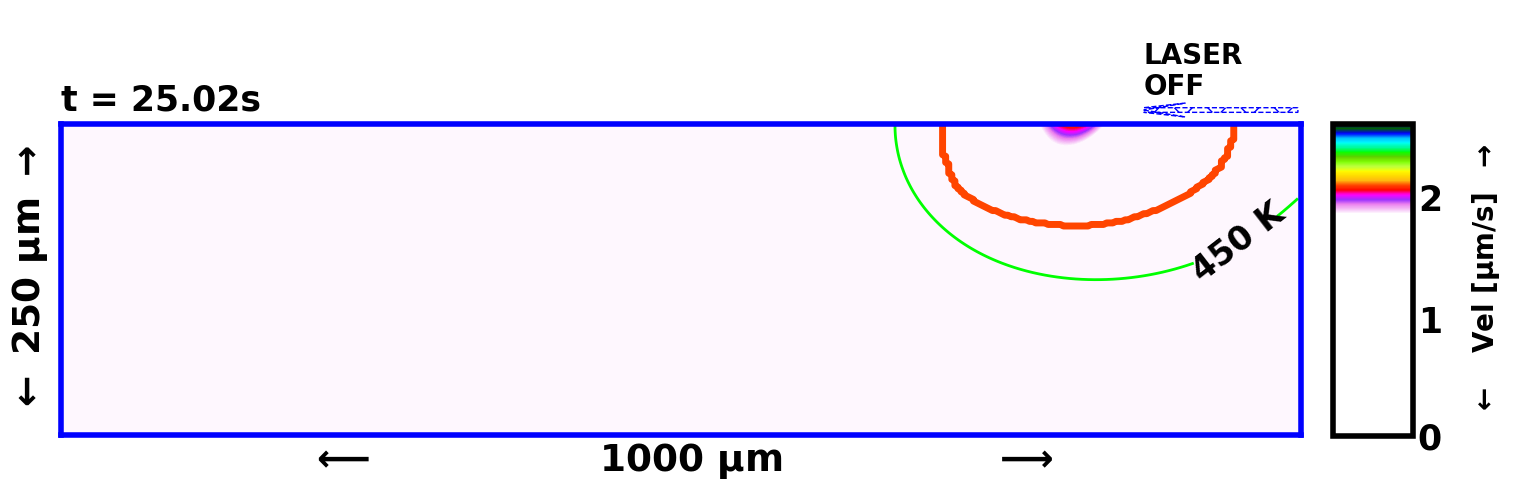

In [28]:
t_step = 418

scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"250 $\mathbf{W}$"

laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_RT[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure


fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))


hmap1 = ax1.imshow(vel_RT[:,:,t_step], cmap='gist_ncar_r', vmin=2, aspect=0.5,  interpolation='bilinear')
# AuFCC_txt = ax1.text(320,180,'FCC', fontsize = 35, weight='bold', color='green')
# AuLIQ_txt = ax1.text(laser_pos-20, 30,'LIQ', fontsize = 35, weight='bold', color='white')

######################### Laser Arrow ###########################
if timeS_RT[t_step] <= 25:
    ax1.arrow(laser_pos,-75, 0, 71,  width = 4, color='red', length_includes_head=True, clip_on=False)
    ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
    if laser_act_pos < 500:
        ax1.set_title(f't = {timeS_RT[t_step]:.2f}s', pad=10, loc='right', fontsize=25, weight='bold')
        ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
    else:
        ax1.set_title(f't = {timeS_RT[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
        ax1.text(laser_pos-65, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos-65, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
else:
    ax1.set_title(f't = {timeS_RT[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
    ax1.text(350, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.text(350, -20, "OFF", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.arrow(400, -10, -50, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
    ax1.arrow(350, -75, 0, 71,  width = 4, color='none', length_includes_head=True, clip_on=False) # to make the figure height same after laser is turned off
    
contour_level_LIQ = [0.8]
contour_LIQ = plt.contour(LIQ_RT[:, :, t_step], levels=contour_level_LIQ, colors='orangered', linestyles='-', linewidths=5,)

contour_levels = [450, 700, 1337]
contour = plt.contour(temp_RT[:, :, t_step], levels=contour_levels, colors='lime', linewidths=2,)
clabels = plt.clabel(contour, inline=True, fontsize=24, colors='k', fmt='%1.0f K')

ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,401)

for label in clabels: label.set_fontweight('bold')
    
################## Dimensions ###################
ax1.set_xlabel('$\mathbf{\longleftarrow}$                 1000 $ \mathbf{\mu m}$                $\mathbf{\longrightarrow}$', fontsize = 27, weight ='bold',)
ax1.annotate(r'$\mathbf{\leftarrow}$ 250 $\mathbf{\mu m}$ $\mathbf{\rightarrow}$', xy=(0.5, 0.5), xytext=(-0.025, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 27, weight = 'bold', color='k', ha='center', va='center')

############## Color Bar ###########
ax2 = fig.add_axes([0.92, 0.3, 0.05, 0.39]) 
ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
cbar.set_label(r'$\mathbf{\leftarrow}$   Vel $\mathbf{[\mu m/s]}$  $\mathbf{\rightarrow}$', color='k',  labelpad=20, fontsize=20, rotation=90, weight='bold')
cbar.set_ticks([np.max(vel_RT[:,:,t_step])*0.06, (np.max(vel_RT[:,:,t_step]))/2, np.max(vel_RT[:,:,t_step])*0.96], labels=[f'{np.min(vel_RT[:,:,t_step]):.0f}', f'{np.max(vel_RT[:,:,t_step])/2 :.0f}', f'{np.max(vel_RT[:,:,t_step]):.0f}'], weight='bold') 

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(4)
ax1.spines[:].set_color('b')
ax2.spines[:].set_linewidth(4)
line = Line2D([1.041, 1.041], [0.35, 0.65], transform=fig.transFigure, color="none", linewidth=3, linestyle='-')
fig.add_artist(line)

# plt.savefig('../../figures/Vel_RingTDB.png',bbox_inches='tight', dpi=800)
plt.show()

## Fitting

In [29]:
model_RingFitting = np.load(path+'/Ring/Fitting/Ring_Fitting.npz')

LIQ_RF     = model_RingFitting['arr1']
FCC_RF     = model_RingFitting['arr2']
vel_RF     = model_RingFitting['arr3']
temp_RF    = model_RingFitting['arr4']
timeS_RF  = model_RingFitting['arr5']

time_steps_RF =  timeS_RF.shape[0]

### Phases

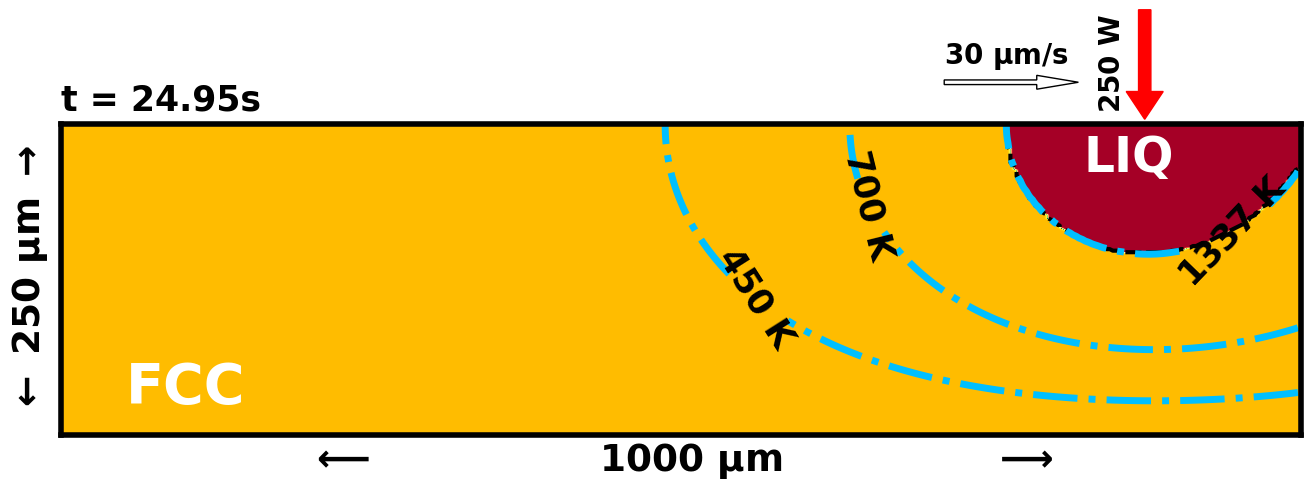

In [30]:
t_step = 482

scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"250 $\mathbf{W}$"

laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_RF[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure

fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

cmap = plt.get_cmap('RdYlGn_r')
cmap.set_under('white', alpha=0)
hmap1 = ax1.imshow(LIQ_RF[:,:,t_step], cmap=cmap, vmin=0.5, vmax=1.0, aspect=0.5,  interpolation='quadric')

cmap = plt.get_cmap('Wistia')
# cmap = cold2hot
cmap.set_under('white', alpha=0) 
hmap2 = ax1.imshow(FCC_RF[:,:,t_step], cmap=cmap, vmin=0.5, vmax=1.5, aspect=0.5, interpolation='quadric')

contour_level_LIQ = [0.8]
contour_LIQ = plt.contour(LIQ_RF[:, :, t_step], levels=contour_level_LIQ, colors='k', linestyles='--', linewidths=3,)

contour_levels = [450, 700,  1337]
contour = ax1.contour(temp_RF[:, :, t_step], levels=contour_levels, colors='deepskyblue', linewidths=5, linestyles='dashdot')
clabels = ax1.clabel(contour, inline=True, fontsize=25, colors='k', fmt='%1.0f K')
for label in clabels: label.set_fontweight('bold')
    
if timeS_RF[t_step] <= 25:
    ax1.arrow(laser_pos,-75, 0, 71,  width = 4, color='red', length_includes_head=True, clip_on=False)
    ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
    if laser_act_pos < 500:
        ax1.set_title(f't = {timeS_RF[t_step]:.2f}s', pad=10, loc='right', fontsize=25, weight='bold')
        ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
    else:
        ax1.set_title(f't = {timeS_RF[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
        ax1.text(laser_pos-65, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos-65, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
else:
    ax1.set_title(f't = {timeS_RF[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
    ax1.text(350, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.text(350, -20, "OFF", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.arrow(400, -10, -50, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
    ax1.arrow(350, -75, 0, 71,  width = 4, color='none', length_includes_head=True, clip_on=False) # to make the figure height same after laser is turned off

    
AuFCC_txt = ax1.text(20,180,'FCC', fontsize = 40, weight='bold', color='white')
if timeS_RF[t_step] <= 25:
    AuLIQ_txt = ax1.text(laser_pos-20, 30,'LIQ', fontsize = 35, weight='bold', color='white')


ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,401)

################## Dimensions ###################
ax1.set_xlabel('$\mathbf{\longleftarrow}$                 1000 $ \mathbf{\mu m}$                $\mathbf{\longrightarrow}$', fontsize = 27, weight ='bold',)
ax1.annotate(r'$\mathbf{\leftarrow}$ 250 $\mathbf{\mu m}$ $\mathbf{\rightarrow}$', xy=(0.5, 0.5), xytext=(-0.025, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 27, weight = 'bold', color='k', ha='center', va='center')

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(4)
# ax1.add_patch(patches.Rectangle((-1, -1), 402, 202, linewidth=4, edgecolor='k', facecolor='none'))

# plt.savefig('../../figures/Phase_RingFIT.png',bbox_inches='tight', dpi=800)
plt.show()

### Temperature

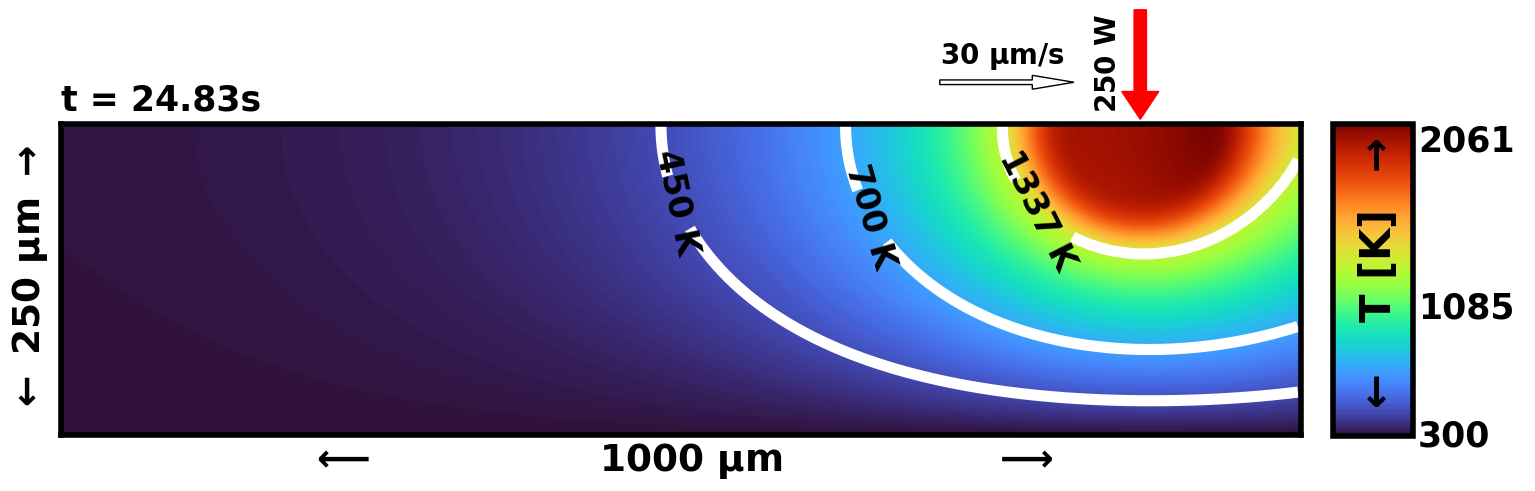

In [31]:
t_step = 480

scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"250 $\mathbf{W}$"

laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_RF[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure

fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

hmap1 = ax1.imshow(temp_RF[:,:,t_step], cmap='turbo', vmin=300, aspect=0.5,  interpolation='quadric')

if timeS_RF[t_step] <= 25:
    ax1.arrow(laser_pos,-75, 0, 71,  width = 4, color='red', length_includes_head=True, clip_on=False)
    ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
    if laser_act_pos < 500:
        ax1.set_title(f't = {timeS_RF[t_step]:.2f}s', pad=10, loc='right', fontsize=25, weight='bold')
        ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
    else:
        ax1.set_title(f't = {timeS_RF[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
        ax1.text(laser_pos-65, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos-65, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
else:
    ax1.set_title(f't = {timeS_RF[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
    ax1.text(350, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.text(350, -20, "OFF", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.arrow(400, -10, -50, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
    ax1.arrow(350, -75, 0, 71,  width = 4, color='none', length_includes_head=True, clip_on=False) # to make the figure height same after laser is turned off

ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,401)

contour_levels = [450, 700,  1337]
contour = plt.contour(temp_RF[:, :, t_step], levels=contour_levels, colors='white', linewidths=8,)
clabels = plt.clabel(contour, inline=True, fontsize=24, colors='k', fmt='%1.0f K')
for label in clabels: label.set_fontweight('bold')

################## Dimensions ###################
ax1.set_xlabel('$\mathbf{\longleftarrow}$                 1000 $ \mathbf{\mu m}$                $\mathbf{\longrightarrow}$', fontsize = 27, weight ='bold',)
ax1.annotate(r'$\mathbf{\leftarrow}$ 250 $\mathbf{\mu m}$ $\mathbf{\rightarrow}$', xy=(0.5, 0.5), xytext=(-0.025, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 27, weight = 'bold', color='k', ha='center', va='center')

############## Color Bar ###########
ax2 = fig.add_axes([0.92, 0.3, 0.05, 0.39]) 
ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
# cbar.set_label(r'$\mathbf{\leftarrow}$   T [K]  $\mathbf{\rightarrow}$', color='k',  labelpad=-115, fontsize=30, rotation=90, weight='bold')
text = Text(x=0.935, y=0.335, text=r'$\mathbf{\leftarrow}$   T [K]  $\mathbf{\rightarrow}$', fontsize=30, color='k', rotation=90, weight='bold')
fig.add_artist(text)

if timeS_RF[t_step] <= 25:
    cbar.set_ticks([np.min(temp_RF[:,:,t_step])*1.06, (np.max(temp_RF[:,:,t_step]))/2, np.max(temp_RF[:,:,t_step])*0.96], labels=[f'{np.min(temp_RF[:,:,t_step]):.0f}', f'{np.max(temp_RF[:,:,t_step])/2 :.0f}', f'{np.max(temp_RF[:,:,t_step])*0.95:.0f}'], weight='bold') 
else:
    cbar.set_ticks([np.min(temp_RF[:,:,t_step]), (np.max(temp_RF[:,:,t_step])+np.min(temp_RF[:,:,t_step]))/2, np.max(temp_RF[:,:,t_step])], labels=[f'{np.min(temp_RF[:,:,t_step]):.0f}', f'{(np.max(temp_RF[:,:,t_step])+np.min(temp_RF[:,:,t_step]))/2 :.0f}', f'{np.max(temp_RF[:,:,t_step]):.0f}'], weight='bold') 


ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(4)
ax1.spines[:].set_color('k')
ax2.spines[:].set_linewidth(4)
line = Line2D([1.04, 1.04], [0.35, 0.65], transform=fig.transFigure, color="none", linewidth=3, linestyle='-')
fig.add_artist(line)
# plt.savefig('../../figures/Temp_RingFIT.png',bbox_inches='tight', dpi=800)
plt.show()

### Velocity

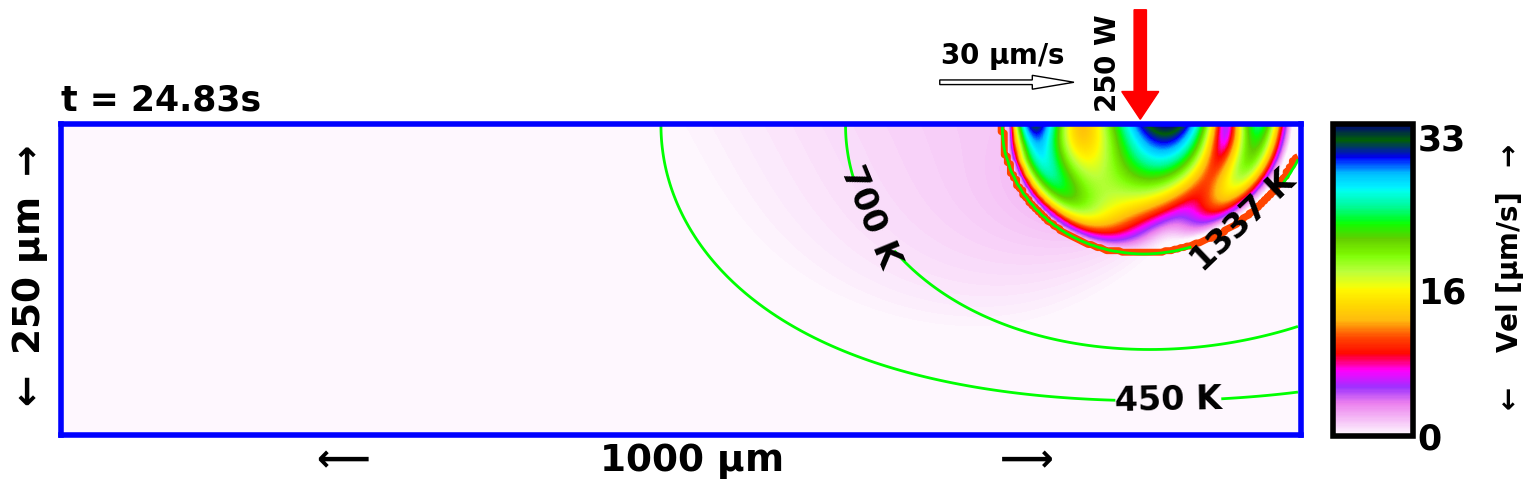

In [32]:
t_step = 480

scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"250 $\mathbf{W}$"

laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_RF[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure


fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))


hmap1 = ax1.imshow(vel_RF[:,:,t_step], cmap='gist_ncar_r', vmin=2, aspect=0.5,  interpolation='bilinear')
# AuFCC_txt = ax1.text(320,180,'FCC', fontsize = 35, weight='bold', color='green')
# AuLIQ_txt = ax1.text(laser_pos-20, 30,'LIQ', fontsize = 35, weight='bold', color='white')

######################### Laser Arrow ###########################
if timeS_RF[t_step] <= 25:
    ax1.arrow(laser_pos,-75, 0, 71,  width = 4, color='red', length_includes_head=True, clip_on=False)
    ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
    if laser_act_pos < 500:
        ax1.set_title(f't = {timeS_RF[t_step]:.2f}s', pad=10, loc='right', fontsize=25, weight='bold')
        ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
    else:
        ax1.set_title(f't = {timeS_RF[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
        ax1.text(laser_pos-65, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos-65, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
else:
    ax1.set_title(f't = {timeS_RF[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
    ax1.text(350, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.text(350, -20, "OFF", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.arrow(400, -10, -50, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
    ax1.arrow(350, -75, 0, 71,  width = 4, color='none', length_includes_head=True, clip_on=False) # to make the figure height same after laser is turned off
    
contour_level_LIQ = [0.8]
contour_LIQ = plt.contour(LIQ_RF[:, :, t_step], levels=contour_level_LIQ, colors='orangered', linestyles='-', linewidths=5,)

contour_levels = [450, 700, 1337]
contour = plt.contour(temp_RF[:, :, t_step], levels=contour_levels, colors='lime', linewidths=2,)
clabels = plt.clabel(contour, inline=True, fontsize=24, colors='k', fmt='%1.0f K')

ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,401)

for label in clabels: label.set_fontweight('bold')
    
################## Dimensions ###################
ax1.set_xlabel('$\mathbf{\longleftarrow}$                 1000 $ \mathbf{\mu m}$                $\mathbf{\longrightarrow}$', fontsize = 27, weight ='bold',)
ax1.annotate(r'$\mathbf{\leftarrow}$ 250 $\mathbf{\mu m}$ $\mathbf{\rightarrow}$', xy=(0.5, 0.5), xytext=(-0.025, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 27, weight = 'bold', color='k', ha='center', va='center')

############## Color Bar ###########
ax2 = fig.add_axes([0.92, 0.3, 0.05, 0.39]) 
ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
cbar.set_label(r'$\mathbf{\leftarrow}$   Vel $\mathbf{[\mu m/s]}$  $\mathbf{\rightarrow}$', color='k',  labelpad=20, fontsize=20, rotation=90, weight='bold')
cbar.set_ticks([np.max(vel_RF[:,:,t_step])*0.06, (np.max(vel_RF[:,:,t_step]))/2, np.max(vel_RF[:,:,t_step])*0.96], labels=[f'{np.min(vel_RF[:,:,t_step]):.0f}', f'{np.max(vel_RF[:,:,t_step])/2 :.0f}', f'{np.max(vel_RF[:,:,t_step]):.0f}'], weight='bold') 

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(4)
ax1.spines[:].set_color('b')
ax2.spines[:].set_linewidth(4)
line = Line2D([1.041, 1.041], [0.35, 0.65], transform=fig.transFigure, color="none", linewidth=3, linestyle='-')
fig.add_artist(line)
# plt.savefig('../../figures/Vel_RingFIT.png',bbox_inches='tight', dpi=800)
plt.show()

# Bessel

## TDB

In [33]:
model_BesselTDB = np.load(path+'/Bessel/TDB/Bessel_TDB.npz')

LIQ_BT     = model_BesselTDB['arr1']
FCC_BT     = model_BesselTDB['arr2']
vel_BT     = model_BesselTDB['arr3']
temp_BT    = model_BesselTDB['arr4']
timeS_BT  = model_BesselTDB['arr5']

time_steps_BT =  timeS_BT.shape[0]

### Phases

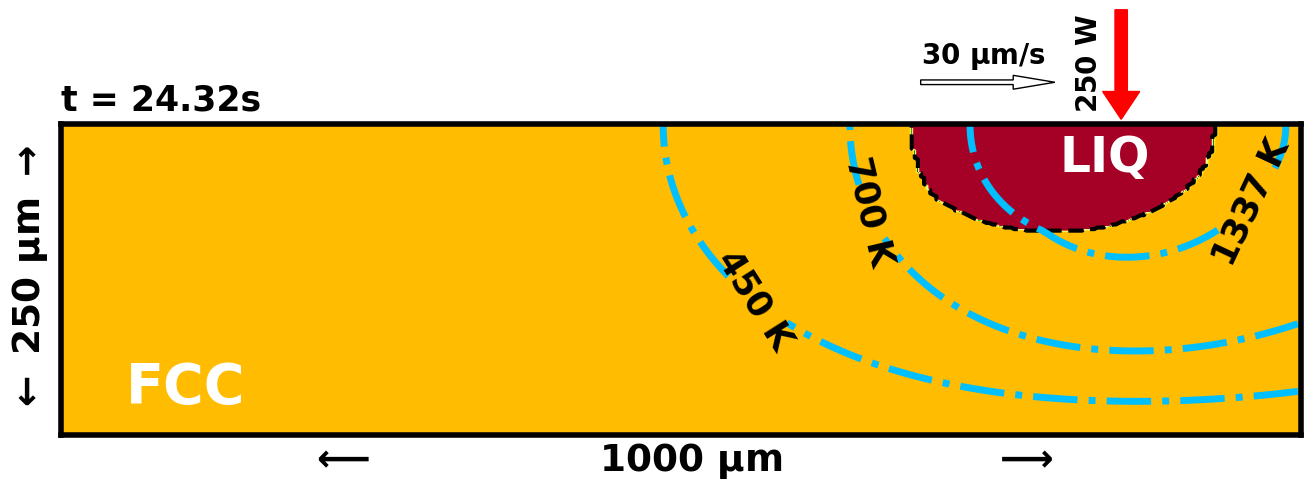

In [34]:
t_step = 440

scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"250 $\mathbf{W}$"

laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_BT[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure

fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

cmap = plt.get_cmap('RdYlGn_r')
cmap.set_under('white', alpha=0)
hmap1 = ax1.imshow(LIQ_BT[:,:,t_step], cmap=cmap, vmin=0.5, vmax=1.0, aspect=0.5,  interpolation='quadric')

cmap = plt.get_cmap('Wistia')
# cmap = cold2hot
cmap.set_under('white', alpha=0) 
hmap2 = ax1.imshow(FCC_BT[:,:,t_step], cmap=cmap, vmin=0.5, vmax=1.5, aspect=0.5, interpolation='quadric')

contour_level_LIQ = [0.8]
contour_LIQ = plt.contour(LIQ_BT[:, :, t_step], levels=contour_level_LIQ, colors='k', linestyles='--', linewidths=3,)

contour_levels = [450, 700,  1337]
contour = ax1.contour(temp_BT[:, :, t_step], levels=contour_levels, colors='deepskyblue', linewidths=5, linestyles='dashdot')
clabels = ax1.clabel(contour, inline=True, fontsize=25, colors='k', fmt='%1.0f K')
for label in clabels: label.set_fontweight('bold')
    
if timeS_BT[t_step] <= 25:
    ax1.arrow(laser_pos,-75, 0, 71,  width = 4, color='red', length_includes_head=True, clip_on=False)
    ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
    if laser_act_pos < 500:
        ax1.set_title(f't = {timeS_BT[t_step]:.2f}s', pad=10, loc='right', fontsize=25, weight='bold')
        ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
    else:
        ax1.set_title(f't = {timeS_BT[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
        ax1.text(laser_pos-65, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos-65, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
else:
    ax1.set_title(f't = {timeS_BT[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
    ax1.text(350, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.text(350, -20, "OFF", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.arrow(400, -10, -50, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
    ax1.arrow(350, -75, 0, 71,  width = 4, color='none', length_includes_head=True, clip_on=False) # to make the figure height same after laser is turned off

    
AuFCC_txt = ax1.text(20,180,'FCC', fontsize = 40, weight='bold', color='white')
AuLIQ_txt = ax1.text(laser_pos-20, 30,'LIQ', fontsize = 35, weight='bold', color='white')


ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,401)

################## Dimensions ###################
ax1.set_xlabel('$\mathbf{\longleftarrow}$                 1000 $ \mathbf{\mu m}$                $\mathbf{\longrightarrow}$', fontsize = 27, weight ='bold',)
ax1.annotate(r'$\mathbf{\leftarrow}$ 250 $\mathbf{\mu m}$ $\mathbf{\rightarrow}$', xy=(0.5, 0.5), xytext=(-0.025, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 27, weight = 'bold', color='k', ha='center', va='center')

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(4)
# ax1.add_patch(patches.Rectangle((-1, -1), 402, 202, linewidth=4, edgecolor='k', facecolor='none'))

# plt.savefig('../../figures/Phase_BesselTDB.png',bbox_inches='tight', dpi=800)
plt.show()

### Temperature

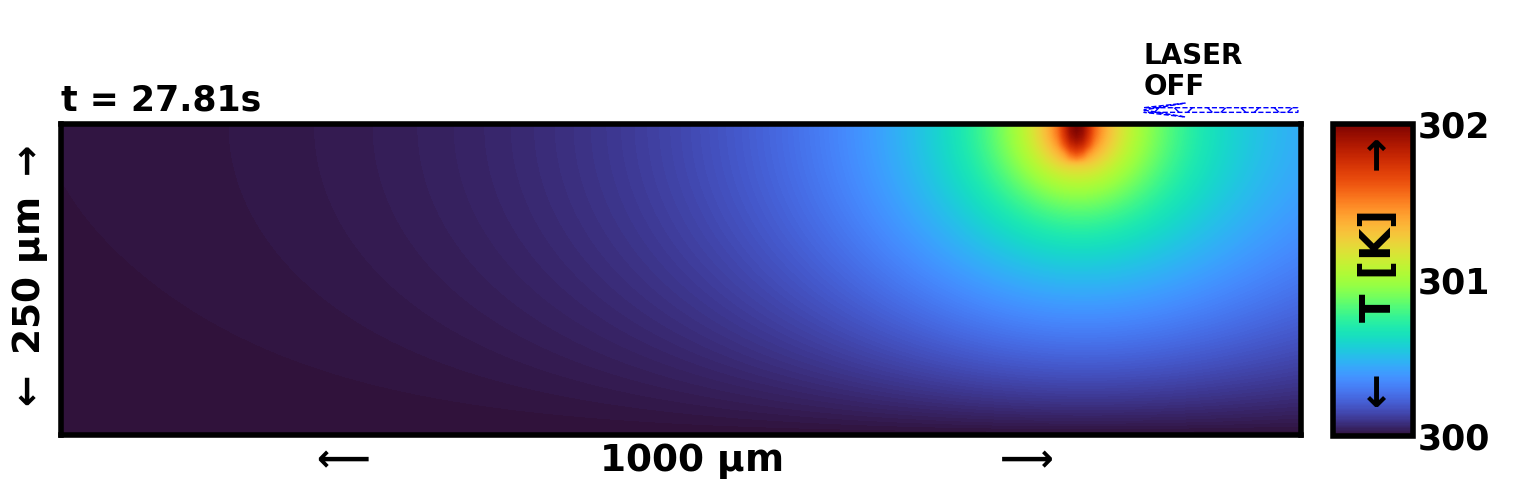

In [35]:
t_step = 545

scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"250 $\mathbf{W}$"

laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_BT[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure

fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

hmap1 = ax1.imshow(temp_BT[:,:,t_step], cmap='turbo', vmin=300, aspect=0.5,  interpolation='quadric')

if timeS_BT[t_step] <= 25:
    ax1.arrow(laser_pos,-75, 0, 71,  width = 4, color='red', length_includes_head=True, clip_on=False)
    ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
    if laser_act_pos < 500:
        ax1.set_title(f't = {timeS_BT[t_step]:.2f}s', pad=10, loc='right', fontsize=25, weight='bold')
        ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
    else:
        ax1.set_title(f't = {timeS_BT[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
        ax1.text(laser_pos-65, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos-65, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
else:
    ax1.set_title(f't = {timeS_BT[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
    ax1.text(350, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.text(350, -20, "OFF", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.arrow(400, -10, -50, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
    ax1.arrow(350, -75, 0, 71,  width = 4, color='none', length_includes_head=True, clip_on=False) # to make the figure height same after laser is turned off

ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,401)

contour_levels = [450, 700,  1337]
contour = plt.contour(temp_BT[:, :, t_step], levels=contour_levels, colors='white', linewidths=8,)
clabels = plt.clabel(contour, inline=True, fontsize=24, colors='k', fmt='%1.0f K')
for label in clabels: label.set_fontweight('bold')

################## Dimensions ###################
ax1.set_xlabel('$\mathbf{\longleftarrow}$                 1000 $ \mathbf{\mu m}$                $\mathbf{\longrightarrow}$', fontsize = 27, weight ='bold',)
ax1.annotate(r'$\mathbf{\leftarrow}$ 250 $\mathbf{\mu m}$ $\mathbf{\rightarrow}$', xy=(0.5, 0.5), xytext=(-0.025, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 27, weight = 'bold', color='k', ha='center', va='center')

############## Color Bar ###########
ax2 = fig.add_axes([0.92, 0.3, 0.05, 0.39]) 
ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
# cbar.set_label(r'$\mathbf{\leftarrow}$   T [K]  $\mathbf{\rightarrow}$', color='k',  labelpad=-115, fontsize=30, rotation=90, weight='bold')
text = Text(x=0.935, y=0.335, text=r'$\mathbf{\leftarrow}$   T [K]  $\mathbf{\rightarrow}$', fontsize=30, color='k', rotation=90, weight='bold')
fig.add_artist(text)

if timeS_BT[t_step] <= 25:
    cbar.set_ticks([np.min(temp_BT[:,:,t_step])*1.06, (np.max(temp_BT[:,:,t_step]))/2, np.max(temp_BT[:,:,t_step])*0.96], labels=[f'{np.min(temp_BT[:,:,t_step]):.0f}', f'{np.max(temp_BT[:,:,t_step])/2 :.0f}', f'{np.max(temp_BT[:,:,t_step])*0.95:.0f}'], weight='bold') 
else:
    cbar.set_ticks([np.min(temp_BT[:,:,t_step]), (np.max(temp_BT[:,:,t_step])+np.min(temp_BT[:,:,t_step]))/2, np.max(temp_BT[:,:,t_step])], labels=[f'{np.min(temp_BT[:,:,t_step]):.0f}', f'{(np.max(temp_BT[:,:,t_step])+np.min(temp_BT[:,:,t_step]))/2 :.0f}', f'{np.max(temp_BT[:,:,t_step]):.0f}'], weight='bold') 


ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(4)
ax1.spines[:].set_color('k')
ax2.spines[:].set_linewidth(4)
line = Line2D([1.04, 1.04], [0.35, 0.65], transform=fig.transFigure, color="none", linewidth=3, linestyle='-')
fig.add_artist(line)

# plt.savefig('../../figures/Temp_BesselTDB.png',bbox_inches='tight', dpi=800)
plt.show()

### Velocity

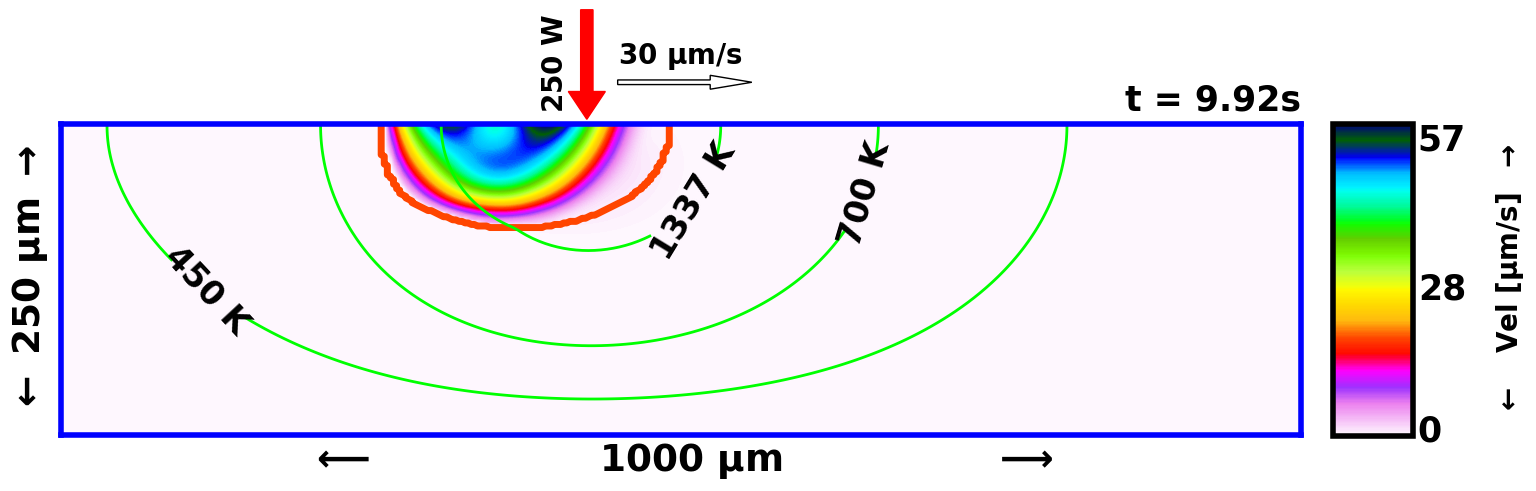

In [36]:
t_step = 200 #455

scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"250 $\mathbf{W}$"

laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_BT[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure


fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))


hmap1 = ax1.imshow(vel_BT[:,:,t_step], cmap='gist_ncar_r', vmin=2, aspect=0.5,  interpolation='bilinear')
# AuFCC_txt = ax1.text(320,180,'FCC', fontsize = 35, weight='bold', color='green')
# AuLIQ_txt = ax1.text(laser_pos-20, 30,'LIQ', fontsize = 35, weight='bold', color='white')

######################### Laser Arrow ###########################
if timeS_BT[t_step] <= 25:
    ax1.arrow(laser_pos,-75, 0, 71,  width = 4, color='red', length_includes_head=True, clip_on=False)
    ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
    if laser_act_pos < 500:
        ax1.set_title(f't = {timeS_BT[t_step]:.2f}s', pad=10, loc='right', fontsize=25, weight='bold')
        ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
    else:
        ax1.set_title(f't = {timeS_BT[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
        ax1.text(laser_pos-65, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos-65, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
else:
    ax1.set_title(f't = {timeS_BT[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
    ax1.text(350, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.text(350, -20, "OFF", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.arrow(400, -10, -50, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
    ax1.arrow(350, -75, 0, 71,  width = 4, color='none', length_includes_head=True, clip_on=False) # to make the figure height same after laser is turned off
    
contour_level_LIQ = [0.8]
contour_LIQ = plt.contour(LIQ_BT[:, :, t_step], levels=contour_level_LIQ, colors='orangered', linestyles='-', linewidths=5,)

contour_levels = [450, 700, 1337]
contour = plt.contour(temp_BT[:, :, t_step], levels=contour_levels, colors='lime', linewidths=2,)
clabels = plt.clabel(contour, inline=True, fontsize=24, colors='k', fmt='%1.0f K')

ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,401)

for label in clabels: label.set_fontweight('bold')
    
################## Dimensions ###################
ax1.set_xlabel('$\mathbf{\longleftarrow}$                 1000 $ \mathbf{\mu m}$                $\mathbf{\longrightarrow}$', fontsize = 27, weight ='bold',)
ax1.annotate(r'$\mathbf{\leftarrow}$ 250 $\mathbf{\mu m}$ $\mathbf{\rightarrow}$', xy=(0.5, 0.5), xytext=(-0.025, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 27, weight = 'bold', color='k', ha='center', va='center')

############## Color Bar ###########
ax2 = fig.add_axes([0.92, 0.3, 0.05, 0.39]) 
ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
cbar.set_label(r'$\mathbf{\leftarrow}$   Vel $\mathbf{[\mu m/s]}$  $\mathbf{\rightarrow}$', color='k',  labelpad=20, fontsize=20, rotation=90, weight='bold')
cbar.set_ticks([np.max(vel_BT[:,:,t_step])*0.06, (np.max(vel_BT[:,:,t_step]))/2, np.max(vel_BT[:,:,t_step])*0.96], labels=[f'{np.min(vel_BT[:,:,t_step]):.0f}', f'{np.max(vel_BT[:,:,t_step])/2 :.0f}', f'{np.max(vel_BT[:,:,t_step]):.0f}'], weight='bold') 

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(4)
ax1.spines[:].set_color('b')
ax2.spines[:].set_linewidth(4)
line = Line2D([1.041, 1.041], [0.35, 0.65], transform=fig.transFigure, color="none", linewidth=3, linestyle='-')
fig.add_artist(line)

# plt.savefig('../../figures/Vel_BesselTDB.png',bbox_inches='tight', dpi=800)
plt.show()

## Fitting

In [11]:
model_BesselFitting = np.load(path+'/Bessel/Fitting/Bessel_Fitting.npz')

LIQ_BF     = model_BesselFitting['arr1']
FCC_BF     = model_BesselFitting['arr2']
vel_BF     = model_BesselFitting['arr3']
temp_BF    = model_BesselFitting['arr4']
timeS_BF  = model_BesselFitting['arr5']

time_steps_BF =  timeS_BF.shape[0]

### Phases

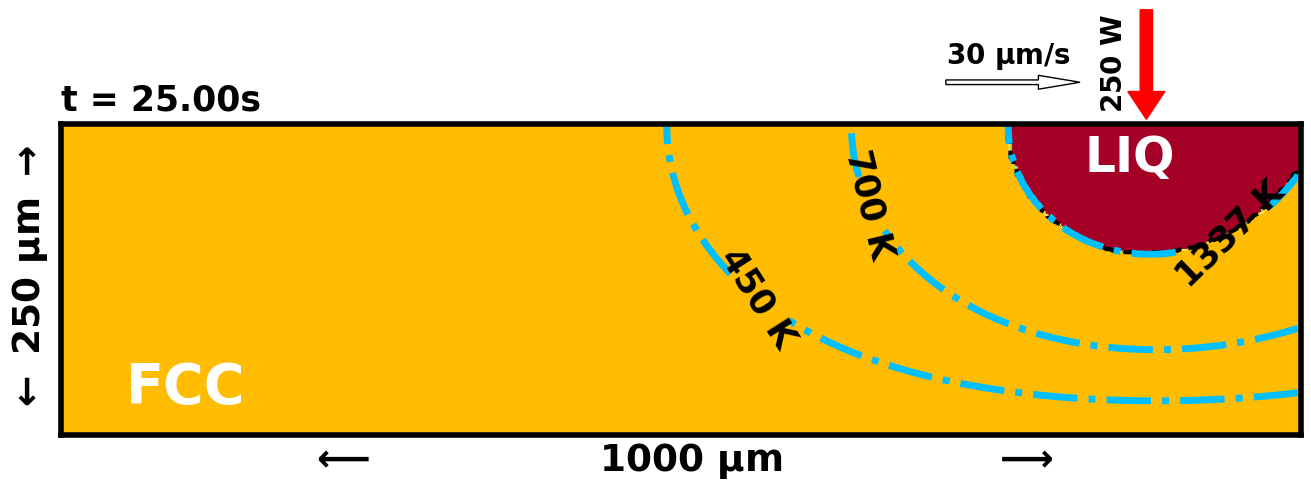

In [18]:
t_step = 479

scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"250 $\mathbf{W}$"

laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_BF[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure

fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

cmap = plt.get_cmap('RdYlGn_r')
cmap.set_under('white', alpha=0)
hmap1 = ax1.imshow(LIQ_BF[:,:,t_step], cmap=cmap, vmin=0.5, vmax=1.0, aspect=0.5,  interpolation='quadric')

cmap = plt.get_cmap('Wistia')
# cmap = cold2hot
cmap.set_under('white', alpha=0) 
hmap2 = ax1.imshow(FCC_BF[:,:,t_step], cmap=cmap, vmin=0.5, vmax=1.5, aspect=0.5, interpolation='quadric')

contour_level_LIQ = [0.8]
contour_LIQ = plt.contour(LIQ_BF[:, :, t_step], levels=contour_level_LIQ, colors='k', linestyles='--', linewidths=3,)

contour_levels = [450, 700,  1337]
contour = ax1.contour(temp_BF[:, :, t_step], levels=contour_levels, colors='deepskyblue', linewidths=5, linestyles='dashdot')
clabels = ax1.clabel(contour, inline=True, fontsize=25, colors='k', fmt='%1.0f K')
for label in clabels: label.set_fontweight('bold')
    
if timeS_BF[t_step] <= 25:
    ax1.arrow(laser_pos,-75, 0, 71,  width = 4, color='red', length_includes_head=True, clip_on=False)
    ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
    if laser_act_pos < 500:
        ax1.set_title(f't = {timeS_BF[t_step]:.2f}s', pad=10, loc='right', fontsize=25, weight='bold')
        ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
    else:
        ax1.set_title(f't = {timeS_BF[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
        ax1.text(laser_pos-65, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos-65, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
else:
    ax1.set_title(f't = {timeS_BF[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
    ax1.text(350, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.text(350, -20, "OFF", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.arrow(400, -10, -50, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
    ax1.arrow(350, -75, 0, 71,  width = 4, color='none', length_includes_head=True, clip_on=False) # to make the figure height same after laser is turned off

    
AuFCC_txt = ax1.text(20,180,'FCC', fontsize = 40, weight='bold', color='white')
if timeS_BF[t_step] <= 25:
    AuLIQ_txt = ax1.text(laser_pos-20, 30,'LIQ', fontsize = 35, weight='bold', color='white')
    

ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,401)

################## Dimensions ###################
ax1.set_xlabel('$\mathbf{\longleftarrow}$                 1000 $ \mathbf{\mu m}$                $\mathbf{\longrightarrow}$', fontsize = 27, weight ='bold',)
ax1.annotate(r'$\mathbf{\leftarrow}$ 250 $\mathbf{\mu m}$ $\mathbf{\rightarrow}$', xy=(0.5, 0.5), xytext=(-0.025, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 27, weight = 'bold', color='k', ha='center', va='center')

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(4)
# ax1.add_patch(patches.Rectangle((-1, -1), 402, 202, linewidth=4, edgecolor='k', facecolor='none'))

# plt.savefig('../../figures/Phase_BesselFIT.png',bbox_inches='tight', dpi=800)
plt.show()

In [13]:
FCC_BF.shape

(201, 401, 496)

### Temperature

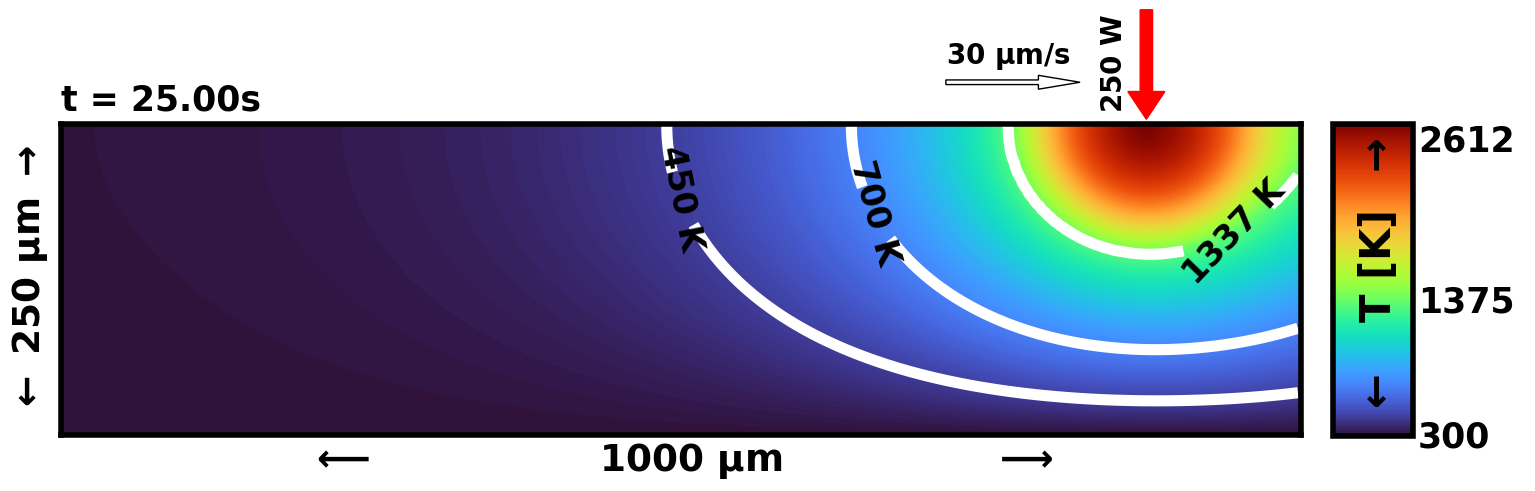

In [25]:
t_step = 479

scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"250 $\mathbf{W}$"

laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_BF[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure

fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

hmap1 = ax1.imshow(temp_BF[:,:,t_step], cmap='turbo', vmin=300, aspect=0.5,  interpolation='quadric')

if timeS_BF[t_step] <= 25:
    ax1.arrow(laser_pos,-75, 0, 71,  width = 4, color='red', length_includes_head=True, clip_on=False)
    ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
    if laser_act_pos < 500:
        ax1.set_title(f't = {timeS_BF[t_step]:.2f}s', pad=10, loc='right', fontsize=25, weight='bold')
        ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
    else:
        ax1.set_title(f't = {timeS_BF[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
        ax1.text(laser_pos-65, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos-65, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
else:
    ax1.set_title(f't = {timeS_BF[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
    ax1.text(350, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.text(350, -20, "OFF", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.arrow(400, -10, -50, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
    ax1.arrow(350, -75, 0, 71,  width = 4, color='none', length_includes_head=True, clip_on=False) # to make the figure height same after laser is turned off

ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,401)

contour_levels = [450, 700,  1337]
contour = plt.contour(temp_BF[:, :, t_step], levels=contour_levels, colors='white', linewidths=8,)
clabels = plt.clabel(contour, inline=True, fontsize=24, colors='k', fmt='%1.0f K')
for label in clabels: label.set_fontweight('bold')

################## Dimensions ###################
ax1.set_xlabel('$\mathbf{\longleftarrow}$                 1000 $ \mathbf{\mu m}$                $\mathbf{\longrightarrow}$', fontsize = 27, weight ='bold',)
ax1.annotate(r'$\mathbf{\leftarrow}$ 250 $\mathbf{\mu m}$ $\mathbf{\rightarrow}$', xy=(0.5, 0.5), xytext=(-0.025, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 27, weight = 'bold', color='k', ha='center', va='center')

############## Color Bar ###########
ax2 = fig.add_axes([0.92, 0.3, 0.05, 0.39]) 
ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
# cbar.set_label(r'$\mathbf{\leftarrow}$   T [K]  $\mathbf{\rightarrow}$', color='k',  labelpad=-115, fontsize=30, rotation=90, weight='bold')
text = Text(x=0.935, y=0.335, text=r'$\mathbf{\leftarrow}$   T [K]  $\mathbf{\rightarrow}$', fontsize=30, color='k', rotation=90, weight='bold')
fig.add_artist(text)

if timeS_BF[t_step] <= 25:
    cbar.set_ticks([np.min(temp_BF[:,:,t_step])*1.06, (np.max(temp_BF[:,:,t_step]))/2, np.max(temp_BF[:,:,t_step])*0.96], labels=[f'{np.min(temp_BF[:,:,t_step]):.0f}', f'{np.max(temp_BF[:,:,t_step])/2 :.0f}', f'{np.max(temp_BF[:,:,t_step])*0.95:.0f}'], weight='bold') 
else:
    cbar.set_ticks([np.min(temp_BF[:,:,t_step]), (np.max(temp_BF[:,:,t_step])+np.min(temp_BF[:,:,t_step]))/2, np.max(temp_BF[:,:,t_step])], labels=[f'{np.min(temp_BF[:,:,t_step]):.0f}', f'{(np.max(temp_BF[:,:,t_step])+np.min(temp_BF[:,:,t_step]))/2 :.0f}', f'{np.max(temp_BF[:,:,t_step]):.0f}'], weight='bold') 


ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(4)
ax1.spines[:].set_color('k')
ax2.spines[:].set_linewidth(4)
line = Line2D([1.04, 1.04], [0.35, 0.65], transform=fig.transFigure, color="none", linewidth=3, linestyle='-')
fig.add_artist(line)

# plt.savefig('../../figures/Temp_BesselFIT.png',bbox_inches='tight', dpi=800)
plt.show()

### Velocity

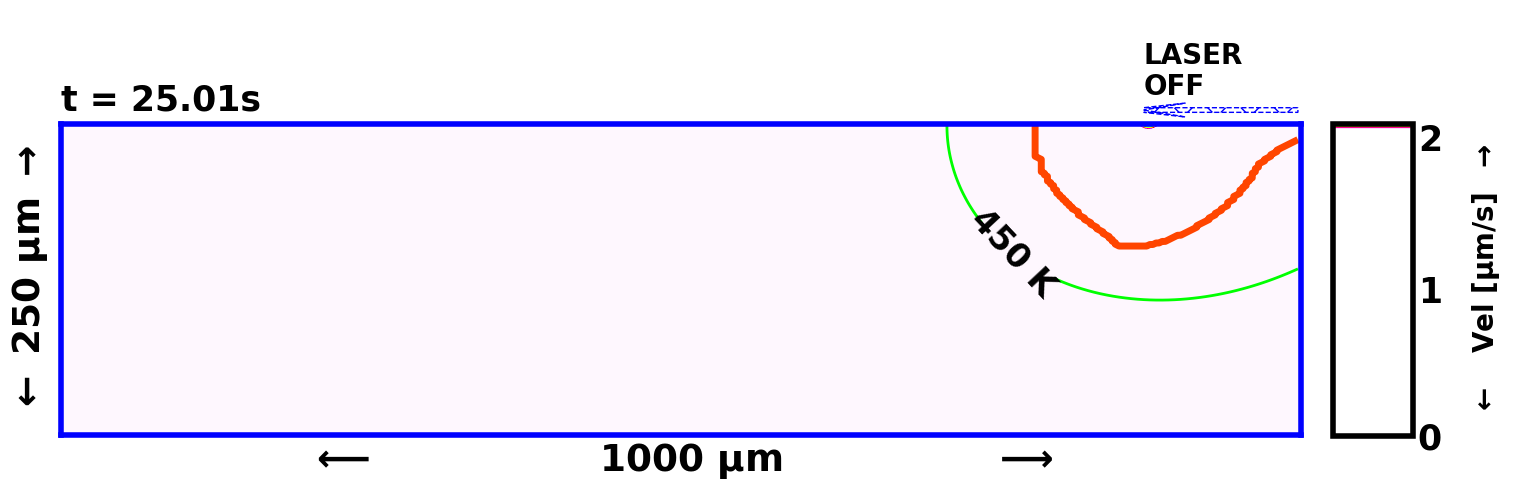

In [29]:
t_step = 495

scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"250 $\mathbf{W}$"

laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_BF[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure


fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))


hmap1 = ax1.imshow(vel_BF[:,:,t_step], cmap='gist_ncar_r', vmin=2, aspect=0.5,  interpolation='bilinear')
# AuFCC_txt = ax1.text(320,180,'FCC', fontsize = 35, weight='bold', color='green')
# AuLIQ_txt = ax1.text(laser_pos-20, 30,'LIQ', fontsize = 35, weight='bold', color='white')

######################### Laser Arrow ###########################
if timeS_BF[t_step] <= 25:
    ax1.arrow(laser_pos,-75, 0, 71,  width = 4, color='red', length_includes_head=True, clip_on=False)
    ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
    if laser_act_pos < 500:
        ax1.set_title(f't = {timeS_BF[t_step]:.2f}s', pad=10, loc='right', fontsize=25, weight='bold')
        ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
    else:
        ax1.set_title(f't = {timeS_BF[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
        ax1.text(laser_pos-65, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
        ax1.arrow(laser_pos-65, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
else:
    ax1.set_title(f't = {timeS_BF[t_step]:.2f}s', pad=10, loc='left', fontsize=25, weight='bold')
    ax1.text(350, -40, "LASER", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.text(350, -20, "OFF", rotation=0, color='k', alpha=1, fontsize=20, weight='bold')
    ax1.arrow(400, -10, -50, 0, fill=False, hatch='x', overhang=1, linestyle='--',  width = 3, color='blue', alpha=1, length_includes_head=True, clip_on=False)
    ax1.arrow(350, -75, 0, 71,  width = 4, color='none', length_includes_head=True, clip_on=False) # to make the figure height same after laser is turned off
    
contour_level_LIQ = [0.8]
contour_LIQ = plt.contour(LIQ_BF[:, :, t_step], levels=contour_level_LIQ, colors='orangered', linestyles='-', linewidths=5,)

contour_levels = [450, 700, 1337]
contour = plt.contour(temp_BF[:, :, t_step], levels=contour_levels, colors='lime', linewidths=2,)
clabels = plt.clabel(contour, inline=True, fontsize=24, colors='k', fmt='%1.0f K')

ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,401)

for label in clabels: label.set_fontweight('bold')
    
################## Dimensions ###################
ax1.set_xlabel('$\mathbf{\longleftarrow}$                 1000 $ \mathbf{\mu m}$                $\mathbf{\longrightarrow}$', fontsize = 27, weight ='bold',)
ax1.annotate(r'$\mathbf{\leftarrow}$ 250 $\mathbf{\mu m}$ $\mathbf{\rightarrow}$', xy=(0.5, 0.5), xytext=(-0.025, 0.5), rotation=90,
             xycoords='axes fraction', textcoords='axes fraction', fontsize = 27, weight = 'bold', color='k', ha='center', va='center')

############## Color Bar ###########
ax2 = fig.add_axes([0.92, 0.3, 0.05, 0.39]) 
ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
cbar.set_label(r'$\mathbf{\leftarrow}$   Vel $\mathbf{[\mu m/s]}$  $\mathbf{\rightarrow}$', color='k',  labelpad=20, fontsize=20, rotation=90, weight='bold')
cbar.set_ticks([np.max(vel_BF[:,:,t_step])*0.06, (np.max(vel_BF[:,:,t_step]))/2, np.max(vel_BF[:,:,t_step])*0.96], labels=[f'{np.min(vel_BF[:,:,t_step]):.0f}', f'{np.max(vel_BF[:,:,t_step])/2 :.0f}', f'{np.max(vel_BF[:,:,t_step]):.0f}'], weight='bold') 

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(4)
ax1.spines[:].set_color('b')
ax2.spines[:].set_linewidth(4)
line = Line2D([1.041, 1.041], [0.35, 0.65], transform=fig.transFigure, color="none", linewidth=3, linestyle='-')
fig.add_artist(line)

# plt.savefig('../../figures/Vel_BesselFIT.png',bbox_inches='tight', dpi=800)
plt.show()